## Project: Dimensionality Reduction
### Part A: Classification

#### Table of Contents

- [Import](#import)
- [Dataset Summary](#dataset-summary)
- [Algorithm Summary](#algorithm-summary)

Dimensionality Reduction
- [Amazon Reviews - Authorship Identification](#amazon-reviews---authorship-identification)
- [Census Income](#census-income-dataset)
- [Forest Cover Type](#cover-type-dataset)
- [Github - ML Developer or Web Developer](#github---ml-developer-or-web-developer)
- [Influenza Outbreak](#influenza-outbreak)
- [Nomao Deduplication](#nomao---deduplication)
- [OCR](#ocr)
- [Spam Detection](#spam)

### Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from scipy.io import loadmat 
import arff
import json

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier,PassiveAggressiveClassifier,LogisticRegression,Perceptron,SGDClassifier

from sklearn.decomposition import PCA,FastICA,KernelPCA,LatentDirichletAllocation,MiniBatchDictionaryLearning, TruncatedSVD,NMF
from sklearn.manifold import LocallyLinearEmbedding,MDS,TSNE,SpectralEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [2]:
classifier_list = [
GaussianNB,
RandomForestClassifier,
GradientBoostingClassifier,
AdaBoostClassifier,
VotingClassifier,
BaggingClassifier,
KNeighborsClassifier,
NearestCentroid,
RBF,
DecisionTreeClassifier,
QuadraticDiscriminantAnalysis,
RidgeClassifier,
LogisticRegression,
PassiveAggressiveClassifier,
Perceptron,
SGDClassifier,
]


**Note:** I opted to use selected classifiers for LazyPredict as some classifiers took extremely long to process (greater than 1 hour for a single iteration). I was careful not to remove performant classifiers e.g. RandomForest even though it takes sufficiently long time.

### Dataset Summary

- **Amazon Reviews** - The dataset is used for authorship identification in online Writeprint which is a new research field of pattern recognition.Dataset is derived from the customers' reviews in Amazon Commerce Website for authorship identification. To examine the robustness of clasification algorithms, dataset identified 50 of the most active users (represented by a unique ID and username) who frequently posted reviews in these newsgroups. The number of reviews we collected for each author is 30. Feature set includes authors' lingustic style such as usage of digit, punctuation, words and sentences' length and usage frequency of words and so on.

- **Census Income** - This data set contains unweighted PUMS census data from the Los Angeles and Long Beach areas for the years 1970, 1980, and 1990. The task is to predict if the income is above or below a specified threshold of $50000 per year. The dataset consists of both nominal and continuous features.
  
- **Cover Type** - The dataset provide information regarding the forest cover type. The feature included 12 measures, but 54 columns of data (10 quantitative variables, 4 binary wilderness areas and 40 binary soil type variables). The target labels is 7.
  
- **Github** - A large social network of GitHub developers which was collected from the public API in June 2019. Nodes are developers who have starred at least 10 repositories and edges are mutual follower relationships between them. The vertex features are extracted based on the location, repositories starred, employer and e-mail address. The task related to the graph is binary node classification - one has to predict whether the GitHub user is a web or a machine learning developer. This target feature was derived from the job title of each user.
  
- **Influenza Outbreak** - By identifying influenza-related tweets, the goal is to forecast the spatiotemporal patterns of influenza outbreaks for different locations and dates. The feature set comprises mainly of keywords pertaining to influenza.
  
- **Nomao** - Nomao collects data about places (name, phone, localization...) from many sources. Deduplication consists in detecting what data refer to the same place. Instances in the dataset compare 2 spots. The datset consists of 34,465 instances, mix of continuous and nominal, labeled by human expert.

- **OCR** - The OCR dataset aims to classify handwritten digits using normalized bitmaps of handwritten digits from a preprinted form.
  
- **Spam** - The dataset can be used to classify whether an email is spam or not. The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.  
Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail.  The run-length attributes (55-57) measure the length of sequences of consecutive capital letters.

### Algorithm Summary
- **PCA** - One of the most common techniques for reducing dimension where the coveriance matrix of the features can be transformed into eigenvalue/eigenvector. Dimensionality can be reduced by selecting components with higher variance as the new features.
  
- **ICA** - Independent Component Analysis may look similar to PCA but is slightly different in the assumption that the independent component are assumed to be non-gaussian and the focus is on maximizing independence rather than correlation like PCA.

- **Kernal PCA** - Kernel PCA is an extension to PCA which uses kernel methods to perform linear transformation. This allows us to use different kernel function such as cosine, sigmoidal, exponentional to transform data.
   
- **Mini Batch Dictionary Learning** - Dictionary learning a sparse-coding technique in which the goal is to determine basis components called atoms that can be used to mimic the original data point.
  
- **Truncated SVD** - Truncated SVD is an extension Singular Value Decomposition algorithm which uses a truncated U matrix to decompose the real matrix resulting in blazing fast dimension reduction.
  
- **NMF** - Non Negative Matrix Factorization is a similat technique to PCA and SVD but results in non-negative components.
  
- **Latent Dirichlet Allocation** - Latent Dirichlet Allocation is originally used for topic-modelling but if we consider each topic as the new basis, the feature vector for each row can be expressed in terms of the topics.
   
- **Locally Linear Embedding** -  Locally Linear Embedding works by determining linear mapping—consisting
of a translation, rotation, and rescaling that maps the high dimensional coordinates of each neighborhood to global internal coordinates on the manifold.

- **MDS** - Multi-dimensional Scaling aims to reduce dimensionality by transforming the data into a lower dimension ensuring that the pairwise distance between each instance is maintained across the transformation.
  
- **t-SNE** - t-distributed Stochastic Neighbour Embedding is non-linear dimension reduction technique with goals of placing similar datapoints together. t-SNE was geared towards visualizng high dimensional data and therefore, works well with components <= 3
  
- **Linear Discriminant Analysis** - Linear Discriminant Analysis although similar to PCA is supervised dimensionality reduction technique and the goal is to maximize the separation between different classes. In its implementation the algorithm requires the number of components to be equal to the number of classes.
  
- **Spectral Embedding** - Spectral Embedding is another non-linear dimensionality reduction technique which uses Laplacian Eigenmaps for the transformation. Laplacian Eigenmaps ensures preservation of local geometry in the data. It relies on the basic assumption the the high dimensional data lies in the low dimensional manifold.


### Amazon Reviews - Authorship Identification
[Back to top](#table-of-contents)

In [47]:
path = r"datasets/Amazon Reviews/data.arff"

raw_data = loadarff(path)
data = pd.DataFrame(raw_data[0])
data.head()

,the,and,a,of,to,is,I,in,that,it,...,ra_,le_to,bra,uch_a,ave_a,n_in_,ied_,nd_b,rso,classlabel
0,5.00,3.00,4.00,4.00,1.00,5.00,1.00,3.00,2.00,4.00,...,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,b'Agresti'
1,12.00,3.00,6.00,2.00,3.00,4.00,2.00,0.00,1.00,3.00,...,0.00,0.00,5.00,0.00,1.00,0.00,0.00,0.00,0.00,b'Agresti'
2,3.00,2.00,2.00,4.00,4.00,2.00,2.00,2.00,3.00,1.00,...,0.00,0.00,6.00,0.00,0.00,0.00,0.00,1.00,0.00,b'Agresti'
3,18.00,4.00,6.00,5.00,4.00,2.00,1.00,0.00,4.00,3.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'Agresti'
4,13.00,4.00,7.00,5.00,4.00,5.00,0.00,1.00,0.00,4.00,...,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,b'Agresti'


In [48]:

X = data.copy(deep=True)
del X['classlabel']

encoder = LabelEncoder()
y = encoder.fit_transform(data['classlabel'])

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

#### Original Data

In [4]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 29/29 [1:08:55<00:00, 142.59s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.82,0.83,None,0.82,6.82
PassiveAggressiveClassifier,0.79,0.81,None,0.78,49.97
LinearSVC,0.78,0.80,None,0.77,763.68
Perceptron,0.77,0.79,None,0.76,13.63
RidgeClassifierCV,0.76,0.77,None,0.76,0.74
RidgeClassifier,0.75,0.77,None,0.75,0.53
ExtraTreesClassifier,0.69,0.70,None,0.68,1.76
NearestCentroid,0.67,0.69,None,0.69,0.36
LGBMClassifier,0.68,0.68,None,0.68,33.01


#### PCA

In [5]:
n = 300
pca = PCA(n_components = n)
pca.fit(X)
print(f"Explained variance with {n} components: {np.sum(pca.explained_variance_ratio_)}")

Explained variance with 300 components: 0.9311996525727839


In [6]:
X_dr = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [7]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_pca = models
results_pca

100%|██████████| 29/29 [01:07<00:00,  2.33s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RidgeClassifierCV,0.68,0.69,None,0.69,0.06
RidgeClassifier,0.68,0.69,None,0.69,0.02
LinearDiscriminantAnalysis,0.68,0.69,None,0.70,0.07
LogisticRegression,0.61,0.63,None,0.61,0.17
NearestCentroid,0.61,0.62,None,0.62,0.02
SGDClassifier,0.61,0.62,None,0.61,0.33
CalibratedClassifierCV,0.61,0.62,None,0.61,28.17
PassiveAggressiveClassifier,0.56,0.56,None,0.56,0.48
LinearSVC,0.52,0.52,None,0.52,6.15


##### Observation
Dimensions were reduced from 10000 columns to just 300 columns where best performance was attained in terms of accuracy/number of column ratio. Interesting when higher dimension were opted e.g.1000, the accuracy dropped. Performance was fast (more than 60x). Also, the dimensions were limited by min(max_cols,max_rows).

#### ICA

In [111]:
n = 300
ica = FastICA(n)
ica.fit(X)

FastICA(n_components=300)

In [112]:
X_dr = ica.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [113]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_ica = models
results_ica

100%|██████████| 29/29 [01:21<00:00,  2.81s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,0.68,0.69,None,0.69,0.07
RidgeClassifierCV,0.68,0.68,None,0.68,0.07
RidgeClassifier,0.68,0.68,None,0.68,0.02
LogisticRegression,0.64,0.64,None,0.64,0.19
NearestCentroid,0.62,0.63,None,0.63,0.02
SGDClassifier,0.59,0.60,None,0.59,0.31
CalibratedClassifierCV,0.58,0.59,None,0.57,28.87
PassiveAggressiveClassifier,0.57,0.58,None,0.57,0.49
LinearSVC,0.54,0.54,None,0.54,6.18


##### Observation
Got very similar results when same number of components are selected. This may be because ICA is a generalization of PCA. Also, slightly slower than PCA.

#### Kernel PCA

In [120]:
n = 300
kpca = KernelPCA(n_components = n,kernel="cosine")
kpca.fit(X)

KernelPCA(kernel='cosine', n_components=300)

In [121]:
X_dr = kpca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [124]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_kpca = models
results_kpca

100%|██████████| 29/29 [01:14<00:00,  2.56s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,0.71,0.72,None,0.72,0.07
RidgeClassifierCV,0.69,0.70,None,0.69,0.07
RidgeClassifier,0.69,0.70,None,0.69,0.03
LogisticRegression,0.67,0.69,None,0.68,0.18
NearestCentroid,0.63,0.66,None,0.65,0.02
SGDClassifier,0.63,0.65,None,0.64,0.30
CalibratedClassifierCV,0.63,0.65,None,0.64,29.68
PassiveAggressiveClassifier,0.62,0.63,None,0.62,0.47
LinearSVC,0.59,0.60,None,0.59,6.18


##### Observation
Using PCA with Sigmoid kernel gave very poor results. Poly kernel gave better results. The best results were observed with cosine kernel.

#### LDA

In [131]:
n = 300
lda = LatentDirichletAllocation(n_components = n)
lda.fit(X)

LatentDirichletAllocation(n_components=300)

In [132]:
X_dr = lda.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [133]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_lda = models
results_lda

100%|██████████| 29/29 [01:29<00:00,  3.10s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.34,0.35,None,0.33,0.45
XGBClassifier,0.33,0.32,None,0.32,12.79
LGBMClassifier,0.32,0.32,None,0.31,19.23
BaggingClassifier,0.29,0.29,None,0.28,2.20
LinearSVC,0.29,0.28,None,0.25,10.02
CalibratedClassifierCV,0.27,0.28,None,0.23,37.83
NuSVC,0.27,0.28,None,0.26,0.64
LinearDiscriminantAnalysis,0.26,0.26,None,0.24,0.07
KNeighborsClassifier,0.21,0.21,None,0.21,0.14


##### Observation
With the same number of components, LDA got worse results.

#### Mini Batch Dictionary Learning

In [4]:
n = 300
mbdl = MiniBatchDictionaryLearning(n_components = n)
mbdl.fit(X)

MiniBatchDictionaryLearning(n_components=300)

In [5]:
X_dr = mbdl.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [6]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_mbdl = models
results_mbdl

100%|██████████| 29/29 [01:12<00:00,  2.50s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RidgeClassifierCV,0.67,0.68,None,0.67,0.09
RidgeClassifier,0.66,0.68,None,0.66,0.03
LinearDiscriminantAnalysis,0.64,0.65,None,0.65,0.08
CalibratedClassifierCV,0.55,0.57,None,0.55,25.93
PassiveAggressiveClassifier,0.53,0.54,None,0.53,0.58
LinearSVC,0.51,0.52,None,0.51,5.62
LogisticRegression,0.49,0.50,None,0.49,0.21
Perceptron,0.38,0.39,None,0.38,0.28
SGDClassifier,0.36,0.37,None,0.37,0.37


##### Observation
When higher components were used, the dimension reduction took a long time.

#### Truncated SVD

In [31]:
n = 300
tsvd = TruncatedSVD(n_components = n)
tsvd.fit(X)

TruncatedSVD(n_components=300)

In [32]:
X_dr = tsvd.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [33]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_tsvd = models
results_tsvd

100%|██████████| 29/29 [01:21<00:00,  2.80s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RidgeClassifierCV,0.69,0.69,None,0.69,0.08
RidgeClassifier,0.69,0.69,None,0.69,0.03
LinearDiscriminantAnalysis,0.66,0.67,None,0.67,0.09
NearestCentroid,0.64,0.65,None,0.65,0.02
LogisticRegression,0.64,0.64,None,0.64,0.19
CalibratedClassifierCV,0.62,0.63,None,0.62,29.26
PassiveAggressiveClassifier,0.59,0.59,None,0.59,0.50
SGDClassifier,0.58,0.58,None,0.58,0.33
LinearSVC,0.57,0.57,None,0.57,6.23


##### Observation
Very fast. Same performance degradation for n > 300 like other algorithms.

#### NMF

In [42]:
n = 300
nmf = NMF(n_components = n)
nmf.fit(X)

NMF(n_components=300)

In [43]:
X_dr = nmf.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [44]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_nmf = models
results_nmf

100%|██████████| 29/29 [01:10<00:00,  2.42s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.66,0.67,None,0.66,0.60
SGDClassifier,0.61,0.63,None,0.61,0.30
NuSVC,0.58,0.61,None,0.60,0.75
NearestCentroid,0.59,0.60,None,0.59,0.02
RidgeClassifierCV,0.58,0.59,None,0.58,0.07
RidgeClassifier,0.57,0.58,None,0.57,0.03
LinearDiscriminantAnalysis,0.57,0.57,None,0.57,0.08
CalibratedClassifierCV,0.55,0.56,None,0.54,28.66
SVC,0.50,0.54,None,0.52,0.73


##### Observation
Took long time for dimension reduction.

#### Locally Linear Embedding

In [58]:
n = 300
lle = LocallyLinearEmbedding(n_components = n)
lle.fit(X)

LocallyLinearEmbedding(n_components=300)

In [59]:
X_dr = lle.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [60]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_lle = models
results_lle

100%|██████████| 29/29 [01:57<00:00,  4.05s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,0.35,0.34,None,0.36,0.24
NearestCentroid,0.35,0.34,None,0.36,0.05
RidgeClassifierCV,0.34,0.33,None,0.34,0.20
RidgeClassifier,0.34,0.33,None,0.34,0.04
LogisticRegression,0.32,0.32,None,0.32,1.38
ExtraTreesClassifier,0.32,0.32,None,0.32,0.58
PassiveAggressiveClassifier,0.30,0.31,None,0.31,1.34
RandomForestClassifier,0.31,0.31,None,0.31,3.86
NuSVC,0.30,0.30,None,0.32,1.12


##### Observation
Slower for higher dimension. Performane not on par with PCA.

#### MDS

In [62]:
n = 300
mds = MDS(n_components = n)
mds.fit(X)

MDS(n_components=300)

In [64]:
X_dr = mds.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [65]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_mds = models
results_mds

100%|██████████| 29/29 [01:22<00:00,  2.86s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.27,0.28,None,0.26,0.75
LogisticRegression,0.25,0.25,None,0.25,0.46
SGDClassifier,0.23,0.24,None,0.24,0.42
LinearDiscriminantAnalysis,0.19,0.21,None,0.20,0.08
RidgeClassifierCV,0.17,0.19,None,0.17,0.08
SVC,0.16,0.19,None,0.15,0.74
RidgeClassifier,0.17,0.19,None,0.16,0.02
NearestCentroid,0.18,0.18,None,0.18,0.02
PassiveAggressiveClassifier,0.17,0.18,None,0.17,0.77


##### Observation

#### TSNE

In [93]:
n = 3
tsne = TSNE(n_components = n)

In [94]:
X_dr = tsne.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [95]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_tsne = models
results_tsne

100%|██████████| 16/16 [00:06<00:00,  2.30it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.27,0.27,None,0.27,0.25
KNeighborsClassifier,0.24,0.23,None,0.23,0.01
BaggingClassifier,0.24,0.23,None,0.24,0.05
DecisionTreeClassifier,0.19,0.18,None,0.20,0.01
GradientBoostingClassifier,0.13,0.12,None,0.13,6.27
QuadraticDiscriminantAnalysis,0.11,0.11,None,0.09,0.01
GaussianNB,0.09,0.10,None,0.05,0.02
NearestCentroid,0.08,0.08,None,0.05,0.01
RidgeClassifier,0.06,0.07,None,0.02,0.02


##### Observation

#### Spectral Embedding

In [88]:
n = 300
spec = SpectralEmbedding(n_components = n)

In [89]:
X_dr = spec.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [90]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_spec = models
results_spec

100%|██████████| 16/16 [05:16<00:00, 19.75s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RidgeClassifier,0.32,0.34,None,0.32,0.02
LogisticRegression,0.29,0.31,None,0.30,0.41
NearestCentroid,0.28,0.30,None,0.29,0.02
SGDClassifier,0.27,0.29,None,0.28,0.53
PassiveAggressiveClassifier,0.20,0.22,None,0.21,0.70
Perceptron,0.20,0.21,None,0.21,0.33
GaussianNB,0.17,0.18,None,0.18,0.04
RandomForestClassifier,0.17,0.18,None,0.17,2.19
BaggingClassifier,0.12,0.12,None,0.12,3.72


#### Linear Discriminant Analysis

In [115]:
ldan = LinearDiscriminantAnalysis(n_components = np.unique(y).shape[0] - 1)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
ldan.fit(X_train,y_train)
X_dr = ldan.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

In [117]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_spec = models
results_spec

100%|██████████| 16/16 [15:46<00:00, 59.17s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.82,0.83,None,0.82,7.41
PassiveAggressiveClassifier,0.79,0.81,None,0.78,50.58
Perceptron,0.77,0.79,None,0.76,13.94
RidgeClassifier,0.75,0.77,None,0.75,0.64
NearestCentroid,0.67,0.69,None,0.69,0.49
RandomForestClassifier,0.68,0.68,None,0.68,2.00
SGDClassifier,0.62,0.64,None,0.60,7.96
BaggingClassifier,0.55,0.56,None,0.55,11.79
GaussianNB,0.43,0.46,None,0.44,1.10


##### Observation
Similar performance to that of the original data

### Census Income Dataset
[Back to top](#table-of-contents)

In [65]:
path = r"datasets/CensusIncome/dataset.arff"

raw_data = arff.load(open(path, 'r'))
data = pd.DataFrame(raw_data['data'],columns=[x[0] for x in raw_data['attributes']])
data = data.sample(5000,random_state=123)
print(f"Data Shape: {data.shape}")
data.head()

Data Shape: (5000, 42)


,age,class_worker,det_ind_code,det_occ_code,education,wage_per_hour,hs_college,marital_stat,major_ind_code,major_occ_code,...,country_father,country_mother,country_self,citizenship,own_or_self,vet_question,vet_benefits,weeks_worked,year,income_50k
56554,38,Private,38,33,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
95262,39,Private,34,23,High school graduate,0,Not in universe,Never married,Finance insurance and real estate,Adm support including clerical,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
120430,28,Not in universe,0,0,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94,- 50000.
195035,45,Self-employed-not incorporated,37,31,7th and 8th grade,0,Not in universe,Widowed,Business and repair services,Other service,...,None,Guatemala,Guatemala,Foreign born- Not a citizen of U S,0,Not in universe,2,17,94,- 50000.
134048,49,Local government,43,26,Associates degree-academic program,800,Not in universe,Divorced,Education,Adm support including clerical,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,46,94,- 50000.


In [66]:
X = data.copy(deep=True)
del X['income_50k']
X = pd.get_dummies(X)

encoder = LabelEncoder()
y = encoder.fit_transform(data['income_50k'])

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

In [67]:
unique,counts = np.unique(y,return_counts=True)
counts

array([4681,  319])

##### Observation
Had to be subsampled because original dataset failed for most algorithm due to very large size

#### Original Data

In [6]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 16/16 [00:09<00:00,  1.64it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.76,0.83,0.83,0.82,0.06
QuadraticDiscriminantAnalysis,0.68,0.74,0.74,0.76,3.19
GaussianNB,0.62,0.74,0.74,0.71,0.09
PassiveAggressiveClassifier,0.91,0.74,0.74,0.92,0.09
Perceptron,0.92,0.74,0.74,0.92,0.09
SGDClassifier,0.93,0.71,0.71,0.93,0.63
AdaBoostClassifier,0.95,0.70,0.70,0.94,0.43
GradientBoostingClassifier,0.95,0.67,0.67,0.94,1.34
DecisionTreeClassifier,0.92,0.66,0.66,0.92,0.09


#### PCA

In [6]:
n = 10
pca = PCA(n_components = n)
pca.fit(X)
print(f"Explained variance with {n} components: {np.sum(pca.explained_variance_ratio_)}")

Explained variance with 10 components: 0.9999996506983032


In [7]:
X_dr = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [8]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_pca = models
results_pca

100%|██████████| 16/16 [00:01<00:00,  8.21it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.87,0.79,0.79,0.89,0.01
PassiveAggressiveClassifier,0.91,0.70,0.70,0.92,0.01
SGDClassifier,0.93,0.67,0.67,0.93,0.01
GradientBoostingClassifier,0.95,0.66,0.66,0.94,0.79
GaussianNB,0.93,0.66,0.66,0.92,0.02
QuadraticDiscriminantAnalysis,0.92,0.66,0.66,0.92,0.01
AdaBoostClassifier,0.94,0.65,0.65,0.93,0.21
DecisionTreeClassifier,0.91,0.63,0.63,0.91,0.03
LogisticRegression,0.95,0.63,0.63,0.93,0.02


##### Observation
Just using 10 components, almost similar results were obtained as the original data. The computation was also significantly faster.

#### ICA

In [11]:
n = 10
ica = FastICA(n,fun="exp")
ica.fit(X)

FastICA(fun='exp', n_components=10)

In [12]:
X_dr = ica.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [13]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_ica = models
results_ica

100%|██████████| 16/16 [00:02<00:00,  7.89it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.88,0.76,0.76,0.90,0.01
PassiveAggressiveClassifier,0.91,0.71,0.71,0.91,0.01
GaussianNB,0.93,0.67,0.67,0.93,0.03
QuadraticDiscriminantAnalysis,0.92,0.66,0.66,0.92,0.01
DecisionTreeClassifier,0.91,0.66,0.66,0.91,0.03
AdaBoostClassifier,0.94,0.64,0.64,0.93,0.21
GradientBoostingClassifier,0.94,0.64,0.64,0.93,0.80
RandomForestClassifier,0.94,0.63,0.63,0.93,0.60
LogisticRegression,0.95,0.63,0.63,0.94,0.02


##### Observation
Almost similar performance as PCA for same number of components.

#### Kernel PCA

In [58]:
n = 10
kpca = KernelPCA(n_components = n)
kpca.fit(X)

KernelPCA(n_components=10)

In [59]:
X_dr = kpca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [60]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_kpca = models
results_kpca

100%|██████████| 16/16 [00:01<00:00,  8.28it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.87,0.79,0.79,0.89,0.01
PassiveAggressiveClassifier,0.91,0.70,0.70,0.92,0.01
SGDClassifier,0.93,0.67,0.67,0.93,0.02
GradientBoostingClassifier,0.95,0.66,0.66,0.94,0.78
GaussianNB,0.93,0.66,0.66,0.92,0.01
QuadraticDiscriminantAnalysis,0.92,0.66,0.66,0.92,0.02
AdaBoostClassifier,0.94,0.65,0.65,0.93,0.20
DecisionTreeClassifier,0.91,0.63,0.63,0.91,0.04
LogisticRegression,0.95,0.63,0.63,0.93,0.02


##### Observation


#### LDA

In [61]:
n = 10
lda = LatentDirichletAllocation(n_components = n)
lda.fit(X)

LatentDirichletAllocation()

In [62]:
X_dr = lda.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [63]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_lda = models
results_lda

100%|██████████| 16/16 [00:01<00:00,  9.43it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.90,0.69,0.69,0.91,0.01
NearestCentroid,0.89,0.69,0.69,0.90,0.01
GaussianNB,0.90,0.68,0.68,0.91,0.01
DecisionTreeClassifier,0.91,0.63,0.63,0.91,0.03
Perceptron,0.92,0.60,0.60,0.91,0.01
RandomForestClassifier,0.93,0.59,0.59,0.92,0.53
AdaBoostClassifier,0.94,0.59,0.59,0.92,0.18
GradientBoostingClassifier,0.94,0.59,0.59,0.92,0.67
BaggingClassifier,0.93,0.58,0.58,0.92,0.15


##### Observation


#### Mini Batch Dictionary Learning

In [26]:
n = 10
mbdl = MiniBatchDictionaryLearning(n_components = n)
mbdl.fit(X)

MiniBatchDictionaryLearning(n_components=10)

In [27]:
X_dr = mbdl.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [28]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_mbdl = models
results_mbdl

100%|██████████| 16/16 [00:01<00:00,  8.11it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.92,0.67,0.67,0.92,0.03
GaussianNB,0.92,0.66,0.66,0.92,0.01
QuadraticDiscriminantAnalysis,0.92,0.66,0.66,0.92,0.01
PassiveAggressiveClassifier,0.94,0.64,0.64,0.93,0.01
NearestCentroid,0.90,0.63,0.63,0.90,0.01
BaggingClassifier,0.94,0.61,0.61,0.92,0.17
LogisticRegression,0.95,0.60,0.60,0.93,0.04
Perceptron,0.92,0.60,0.60,0.91,0.01
KNeighborsClassifier,0.94,0.60,0.60,0.92,0.05


##### Observation
When higher components were used, the dimension reduction took a long time.

#### Truncated SVD

In [17]:
n = 25
tsvd = TruncatedSVD(n_components = n)
tsvd.fit(X)

TruncatedSVD(n_components=25)

In [18]:
X_dr = tsvd.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [19]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_tsvd = models
results_tsvd

100%|██████████| 16/16 [00:04<00:00,  3.83it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.89,0.82,0.82,0.91,0.01
QuadraticDiscriminantAnalysis,0.86,0.81,0.81,0.89,0.01
SGDClassifier,0.93,0.74,0.74,0.93,0.02
AdaBoostClassifier,0.94,0.69,0.69,0.94,0.43
GradientBoostingClassifier,0.95,0.67,0.67,0.94,1.94
BaggingClassifier,0.94,0.67,0.67,0.94,0.51
Perceptron,0.90,0.67,0.67,0.91,0.01
GaussianNB,0.92,0.66,0.66,0.92,0.01
LogisticRegression,0.95,0.66,0.66,0.94,0.03


##### Observation
Very fast. For n=25 gave almost same level of performance as original data.

#### NMF

In [29]:
n = 25
nmf = NMF(n_components = n)
nmf.fit(X)

NMF(n_components=25)

In [30]:
X_dr = nmf.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [31]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_nmf = models
results_nmf

100%|██████████| 16/16 [00:02<00:00,  6.82it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.77,0.84,0.84,0.83,0.01
GaussianNB,0.72,0.82,0.82,0.79,0.01
NearestCentroid,0.75,0.80,0.80,0.81,0.01
DecisionTreeClassifier,0.91,0.70,0.70,0.92,0.04
PassiveAggressiveClassifier,0.93,0.70,0.70,0.93,0.01
AdaBoostClassifier,0.94,0.67,0.67,0.94,0.26
SGDClassifier,0.94,0.67,0.67,0.93,0.02
LogisticRegression,0.94,0.65,0.65,0.93,0.05
GradientBoostingClassifier,0.94,0.64,0.64,0.93,1.05


##### Observation
Better performance than the original data.

#### Locally Linear Embedding

In [32]:
n = 25
lle = LocallyLinearEmbedding(n_components = n)
lle.fit(X)

LocallyLinearEmbedding(n_components=25)

In [33]:
X_dr = lle.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [34]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_lle = models
results_lle

100%|██████████| 16/16 [00:03<00:00,  4.99it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.87,0.68,0.68,0.89,0.01
QuadraticDiscriminantAnalysis,0.92,0.68,0.68,0.92,0.01
NearestCentroid,0.91,0.68,0.68,0.92,0.01
Perceptron,0.90,0.62,0.62,0.90,0.01
SGDClassifier,0.94,0.59,0.59,0.92,0.02
KNeighborsClassifier,0.93,0.57,0.57,0.92,0.05
PassiveAggressiveClassifier,0.94,0.56,0.56,0.92,0.01
DecisionTreeClassifier,0.90,0.55,0.55,0.90,0.07
RidgeClassifier,0.94,0.55,0.55,0.92,0.01


##### Observation
Slower for higher dimension. Performane not on par with PCA.

#### MDS

In [37]:
n = 10
mds = MDS(n_components = n)

MDS(n_components=10)

In [38]:
X_dr = mds.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [39]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_mds = models
results_mds

100%|██████████| 16/16 [00:02<00:00,  7.63it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.93,0.64,0.64,0.93,0.02
GaussianNB,0.93,0.62,0.62,0.92,0.02
BaggingClassifier,0.94,0.59,0.59,0.92,0.21
AdaBoostClassifier,0.94,0.59,0.59,0.92,0.20
DecisionTreeClassifier,0.89,0.59,0.59,0.90,0.04
Perceptron,0.92,0.58,0.58,0.91,0.01
RandomForestClassifier,0.94,0.58,0.58,0.92,0.70
NearestCentroid,0.93,0.58,0.58,0.92,0.01
GradientBoostingClassifier,0.94,0.57,0.57,0.92,0.78


##### Observation
Took too long to reduce dimensions

#### TSNE

In [42]:
n = 3
tsne = TSNE(n_components = n)

In [43]:
X_dr = tsne.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [44]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_tsne = models
results_tsne

100%|██████████| 16/16 [00:00<00:00, 17.36it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.59,0.61,0.61,0.69,0.01
DecisionTreeClassifier,0.90,0.61,0.61,0.90,0.01
KNeighborsClassifier,0.94,0.58,0.58,0.92,0.03
BaggingClassifier,0.93,0.57,0.57,0.92,0.07
RandomForestClassifier,0.93,0.57,0.57,0.92,0.30
AdaBoostClassifier,0.94,0.56,0.56,0.92,0.11
GradientBoostingClassifier,0.94,0.55,0.55,0.92,0.29
QuadraticDiscriminantAnalysis,0.94,0.52,0.52,0.91,0.01
GaussianNB,0.94,0.50,0.50,0.90,0.02


##### Observation

#### Spectral Embedding

In [55]:
n = 25
spec = SpectralEmbedding(n_components = n)

In [56]:
X_dr = spec.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [57]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_spec = models
results_spec

100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.90,0.71,0.71,0.91,0.01
QuadraticDiscriminantAnalysis,0.88,0.71,0.71,0.90,0.02
GaussianNB,0.84,0.69,0.69,0.87,0.02
PassiveAggressiveClassifier,0.91,0.62,0.62,0.91,0.01
DecisionTreeClassifier,0.89,0.59,0.59,0.90,0.12
SGDClassifier,0.93,0.57,0.57,0.92,0.02
GradientBoostingClassifier,0.93,0.57,0.57,0.92,1.93
KNeighborsClassifier,0.94,0.57,0.57,0.92,0.07
LogisticRegression,0.94,0.56,0.56,0.92,0.02


##### Observation

#### Linear Discriminant Analysis

In [110]:
n = np.unique(y).shape[0] - 1
ldan = LinearDiscriminantAnalysis(n_components = n)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
ldan.fit(X_train,y_train)
X_dr = ldan.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [112]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_ldan = models
results_ldan

100%|██████████| 16/16 [00:00<00:00, 26.68it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.90,0.77,0.77,0.91,0.01
Perceptron,0.93,0.72,0.72,0.93,0.01
GaussianNB,0.93,0.72,0.72,0.93,0.01
QuadraticDiscriminantAnalysis,0.93,0.72,0.72,0.93,0.01
RandomForestClassifier,0.93,0.71,0.71,0.93,0.23
DecisionTreeClassifier,0.93,0.71,0.71,0.93,0.01
BaggingClassifier,0.93,0.70,0.70,0.93,0.03
GradientBoostingClassifier,0.94,0.69,0.69,0.93,0.14
KNeighborsClassifier,0.92,0.69,0.69,0.92,0.04


##### Observation


### Cover Type Dataset
[Back to top](#table-of-contents)

In [52]:
path = r"datasets/CoverType/covtype.data.gz"

data = pd.read_csv(path,compression='gzip',header=None)
data = data.sample(100000,random_state=123)
print(f"Data Shape: {data.shape}")
data.head()

Data Shape: (100000, 55)


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
257726,2924,48,15,420,69,666,224,207,114,900,...,1,0,0,0,0,0,0,0,0,2
407572,2857,185,8,95,12,2195,222,246,158,2340,...,0,0,0,0,0,0,0,0,0,2
552796,3410,208,13,702,6,1421,211,251,174,4001,...,0,1,0,0,0,0,0,0,0,1
389602,2798,66,17,391,68,2731,234,204,96,1909,...,0,0,0,0,0,0,0,0,0,2
509827,2970,40,12,313,107,2456,221,213,124,2174,...,0,1,0,0,0,0,0,0,0,1


In [54]:
X = data.copy(deep=True)
del X[54]
y = data[54]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

In [60]:
unique,counts = np.unique(y,return_counts=True)
counts

array([36437, 48856,  6091,   510,  1584,  2983,  3539])

**Observation:** Had to be subsampled because original dataset failed for most algorithm due to very large size. Data has imbalance class which may be due to inappropriate sampling.

#### Original Data

In [10]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 16/16 [03:31<00:00, 13.21s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.90,0.80,None,0.90,4.67
RandomForestClassifier,0.90,0.79,None,0.90,10.39
DecisionTreeClassifier,0.85,0.78,None,0.85,0.79
KNeighborsClassifier,0.86,0.73,None,0.86,97.11
GradientBoostingClassifier,0.77,0.63,None,0.76,87.90
NearestCentroid,0.55,0.59,None,0.58,0.13
LogisticRegression,0.72,0.50,None,0.71,2.08
GaussianNB,0.09,0.43,None,0.07,0.20
QuadraticDiscriminantAnalysis,0.10,0.43,None,0.07,0.29


**Observation:** Good balanced accuracy was observed mostly dominated by ensemble models.

#### PCA

In [8]:
n = 5
pca = PCA(n_components = n)
pca.fit(X)
print(f"Explained variance with {n} components: {np.sum(pca.explained_variance_ratio_)}")

Explained variance with 5 components: 0.5648659152521158


In [9]:
X_dr = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [10]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_pca = models
results_pca

100%|██████████| 16/16 [01:41<00:00,  6.36s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.81,0.64,None,0.81,15.90
BaggingClassifier,0.79,0.61,None,0.79,3.67
DecisionTreeClassifier,0.74,0.59,None,0.74,0.64
KNeighborsClassifier,0.76,0.57,None,0.76,0.68
GradientBoostingClassifier,0.67,0.42,None,0.66,75.25
QuadraticDiscriminantAnalysis,0.47,0.37,None,0.44,0.07
NearestCentroid,0.29,0.36,None,0.36,0.06
GaussianNB,0.54,0.33,None,0.48,0.08
AdaBoostClassifier,0.49,0.33,None,0.48,2.95


In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_pca = models
results_pca

100%|██████████| 16/16 [01:42<00:00,  6.39s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.88,0.75,None,0.87,14.23
KNeighborsClassifier,0.87,0.75,None,0.87,0.74
BaggingClassifier,0.85,0.72,None,0.85,3.13
DecisionTreeClassifier,0.80,0.72,None,0.80,0.54
NearestCentroid,0.45,0.54,None,0.50,0.05
GradientBoostingClassifier,0.74,0.50,None,0.73,77.66
QuadraticDiscriminantAnalysis,0.67,0.41,None,0.66,0.06
LogisticRegression,0.68,0.35,None,0.66,1.89
GaussianNB,0.65,0.35,None,0.63,0.08


**Observation:** Just using 5 components, almost similar results were obtained as the original data. The computation was also significantly faster. Scaling the data impacted the performance negatively of the classification.

#### ICA

In [31]:
n = 5
ica = FastICA(n,fun="exp")
ica.fit(X)

FastICA(fun='exp', n_components=5)

In [32]:
X_dr = ica.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [33]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_ica = models
results_ica

100%|██████████| 16/16 [02:02<00:00,  7.66s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.87,0.75,None,0.87,15.68
KNeighborsClassifier,0.87,0.75,None,0.87,0.74
BaggingClassifier,0.85,0.73,None,0.85,3.16
DecisionTreeClassifier,0.80,0.70,None,0.80,0.54
NearestCentroid,0.45,0.54,None,0.50,0.05
GradientBoostingClassifier,0.73,0.53,None,0.73,96.72
QuadraticDiscriminantAnalysis,0.67,0.41,None,0.66,0.11
LogisticRegression,0.68,0.35,None,0.66,1.69
AdaBoostClassifier,0.60,0.34,None,0.60,2.93


**Observation:** Almost similar performance as PCA for same number of components.

#### Kernel PCA

In [27]:
n = 5
kpca = KernelPCA(n_components = n)
kpca.fit(X_train)

: 

: 

In [ ]:
X_dr = kpca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_kpca = models
results_kpca

**Observation:** Failed due to some internal error

#### LDA

In [24]:
n = 5
lda = LatentDirichletAllocation(n_components = n)
lda.fit(X)

LatentDirichletAllocation(n_components=5)

In [25]:
X_dr = lda.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [26]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_lda = models
results_lda

100%|██████████| 16/16 [01:45<00:00,  6.61s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.61,0.40,None,0.60,20.25
BaggingClassifier,0.60,0.40,None,0.59,4.47
DecisionTreeClassifier,0.56,0.39,None,0.56,0.80
KNeighborsClassifier,0.60,0.37,None,0.59,0.63
GradientBoostingClassifier,0.57,0.34,None,0.53,74.05
NearestCentroid,0.30,0.33,None,0.33,0.06
GaussianNB,0.36,0.30,None,0.29,0.06
QuadraticDiscriminantAnalysis,0.38,0.28,None,0.41,0.07
Perceptron,0.43,0.26,None,0.41,0.18


**Observation:** Issues with negative values. Performance was also very poor.

#### Mini Batch Dictionary Learning

In [8]:
n = 5
mbdl = MiniBatchDictionaryLearning(n_components = n)
mbdl.fit(X)

MiniBatchDictionaryLearning(n_components=5)

In [9]:
X_dr = mbdl.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [10]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_mbdl = models
results_mbdl

100%|██████████| 16/16 [01:43<00:00,  6.47s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.81,0.65,None,0.81,15.75
KNeighborsClassifier,0.79,0.64,None,0.79,0.69
BaggingClassifier,0.79,0.62,None,0.79,3.69
DecisionTreeClassifier,0.74,0.62,None,0.74,0.64
GradientBoostingClassifier,0.67,0.45,None,0.66,77.10
QuadraticDiscriminantAnalysis,0.41,0.39,None,0.37,0.07
GaussianNB,0.40,0.34,None,0.34,0.08
NearestCentroid,0.31,0.32,None,0.35,0.05
AdaBoostClassifier,0.23,0.28,None,0.25,2.94


**Observation:** When higher components were used, the dimension reduction took a long time. Still didn't perform as well as PCA.

#### Truncated SVD

In [11]:
n = 5
tsvd = TruncatedSVD(n_components = n)
tsvd.fit(X)

TruncatedSVD(n_components=5)

In [12]:
X_dr = tsvd.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [13]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_tsvd = models
results_tsvd

100%|██████████| 16/16 [01:41<00:00,  6.36s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.80,0.61,None,0.79,15.74
BaggingClassifier,0.78,0.59,None,0.78,3.46
DecisionTreeClassifier,0.72,0.58,None,0.72,0.59
KNeighborsClassifier,0.74,0.54,None,0.74,0.67
GradientBoostingClassifier,0.67,0.42,None,0.65,75.82
QuadraticDiscriminantAnalysis,0.46,0.40,None,0.46,0.10
NearestCentroid,0.26,0.35,None,0.32,0.05
GaussianNB,0.54,0.33,None,0.49,0.06
PassiveAggressiveClassifier,0.47,0.32,None,0.44,0.21


**Observation:** With fewer components, Truncated SVD didn't perform very well.

#### NMF

In [14]:
n = 5
nmf = NMF(n_components = n)
nmf.fit(X)

NMF(n_components=5)

In [15]:
X_dr = nmf.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [16]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_nmf = models
results_nmf

100%|██████████| 16/16 [01:12<00:00,  4.52s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.72,0.50,None,0.72,10.81
DecisionTreeClassifier,0.66,0.50,None,0.66,0.40
BaggingClassifier,0.71,0.49,None,0.70,2.28
KNeighborsClassifier,0.71,0.48,None,0.71,0.96
GradientBoostingClassifier,0.67,0.39,None,0.65,53.01
QuadraticDiscriminantAnalysis,0.37,0.34,None,0.38,0.06
GaussianNB,0.38,0.33,None,0.39,0.06
NearestCentroid,0.30,0.32,None,0.35,0.05
AdaBoostClassifier,0.39,0.31,None,0.44,2.24


**Observation:** NMF performance was even poorer than Truncated SVD.

#### Locally Linear Embedding

In [17]:
n = 5
lle = LocallyLinearEmbedding(n_components = n)
lle.fit(X)

LocallyLinearEmbedding(n_components=5)

In [18]:
X_dr = lle.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [19]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_lle = models
results_lle

100%|██████████| 16/16 [01:37<00:00,  6.11s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.60,0.37,None,0.59,17.41
DecisionTreeClassifier,0.54,0.36,None,0.54,0.66
BaggingClassifier,0.58,0.36,None,0.57,3.83
KNeighborsClassifier,0.59,0.34,None,0.58,0.71
GradientBoostingClassifier,0.56,0.23,None,0.50,69.72
QuadraticDiscriminantAnalysis,0.03,0.19,None,0.03,0.06
AdaBoostClassifier,0.51,0.17,None,0.43,2.69
LogisticRegression,0.50,0.16,None,0.38,1.71
GaussianNB,0.09,0.16,None,0.07,0.08


**Observation:** Slower for higher dimension. Performane not on par with PCA.

#### MDS

In [20]:
n = 5
mds = MDS(n_components = n)

In [21]:
X_dr = mds.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

: 

: 

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_mds = models
results_mds

**Observation:** Failed due to some internal error

#### TSNE

In [9]:
n = 3
tsne = TSNE(n_components = n)

In [10]:
X_dr = tsne.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [11]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_tsne = models
results_tsne

100%|██████████| 16/16 [01:06<00:00,  4.16s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.86,0.71,None,0.85,8.86
KNeighborsClassifier,0.84,0.71,None,0.84,0.58
BaggingClassifier,0.84,0.70,None,0.84,2.04
DecisionTreeClassifier,0.82,0.69,None,0.82,0.36
GradientBoostingClassifier,0.65,0.42,None,0.63,50.82
NearestCentroid,0.14,0.29,None,0.15,0.06
AdaBoostClassifier,0.48,0.17,None,0.44,2.19
Perceptron,0.24,0.17,None,0.27,0.16
QuadraticDiscriminantAnalysis,0.51,0.16,None,0.43,0.07


##### Observation
- Compact (only used 3 features)
- Poorer Balanced Accuracy, F1 Score and Accuracy
- Very slow
- Optimized for RF and kNN

#### Spectral Embedding

In [12]:
n = 5
spec = SpectralEmbedding(n_components = n)

In [13]:
X_dr = spec.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

: 

: 

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_spec = models
results_spec

**Observation:** Failed due to internal error

#### Linear Discriminant Analysis

In [104]:
n = np.unique(y).shape[0] - 1
ldan = LinearDiscriminantAnalysis(n_components = n)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
ldan.fit(X_train,y_train)
X_dr = ldan.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [106]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_ldan = models
results_ldan

100%|██████████| 16/16 [01:59<00:00,  7.44s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.81,0.69,None,0.81,0.95
RandomForestClassifier,0.82,0.68,None,0.82,16.43
BaggingClassifier,0.80,0.67,None,0.80,4.39
DecisionTreeClassifier,0.75,0.65,None,0.75,0.75
NearestCentroid,0.60,0.60,None,0.63,0.05
GradientBoostingClassifier,0.74,0.57,None,0.73,90.36
GaussianNB,0.65,0.56,None,0.65,0.08
QuadraticDiscriminantAnalysis,0.61,0.55,None,0.60,0.07
LogisticRegression,0.72,0.49,None,0.71,1.76


##### Observation
- Very fast
- Poorer Balanced Accuracy than Original Data
- Poorer F1 Score
- Poorer Accuracy
- Worked well with RF and  kNN

### Github - ML Developer or Web Developer
[Back to top](#table-of-contents)

In [31]:
path = r"datasets/Github/git_web_ml"
y = pd.read_csv(f"{path}/musae_git_target.csv",usecols=['ml_target']).values

data = None
with open(f"{path}/musae_git_features.json",'r') as f:
    data = json.load(f)

X = np.zeros([len(data),len(data)],dtype="u1")
for d in data:
    elements = np.zeros(len(data))
    elements[[int(x) for x in data[d]]] = 1
    X[int(d)] = elements

X = X[:5000,:5000]
y = y[:5000]
X.shape

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

**Observation:** Data had to be subsampled due to large size. This is a graph data so any changes in rows had to be introduced to the columns as well. To reduce memory footprint, data type was changed which allowed to process 5000 x 5000 dataframe easily.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

In [33]:
unique,counts = np.unique(y,return_counts=True)
counts

array([3685, 1315])

**Observation:** The classes were not balanced but the imbalance was not very high.

#### Original Data

In [6]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 16/16 [01:42<00:00,  6.43s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.86,0.80,0.80,0.86,0.63
GradientBoostingClassifier,0.85,0.76,0.76,0.84,29.73
AdaBoostClassifier,0.84,0.74,0.74,0.83,8.78
RandomForestClassifier,0.84,0.74,0.74,0.83,4.24
PassiveAggressiveClassifier,0.76,0.72,0.72,0.77,2.23
LogisticRegression,0.79,0.72,0.72,0.79,1.43
BaggingClassifier,0.83,0.71,0.71,0.82,7.59
DecisionTreeClassifier,0.80,0.71,0.71,0.80,2.76
Perceptron,0.76,0.71,0.71,0.77,1.31


**Observation:** Good performance was observed with the original dataset. No variation was observed with scaling.

#### PCA

In [7]:
n = 3
pca = PCA(n_components = n)
pca.fit(X)
print(f"Explained variance with {n} components: {np.sum(pca.explained_variance_ratio_)}")

Explained variance with 3 components: 0.08984799409817638


In [8]:
X_dr = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [9]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_pca = models
results_pca

100%|██████████| 16/16 [00:00<00:00, 17.23it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
Perceptron,0.82,0.78,0.78,0.83,0.01
NearestCentroid,0.82,0.76,0.76,0.82,0.01
SGDClassifier,0.84,0.75,0.75,0.83,0.01
QuadraticDiscriminantAnalysis,0.84,0.75,0.75,0.83,0.01
LogisticRegression,0.84,0.74,0.74,0.83,0.01
RidgeClassifier,0.84,0.74,0.74,0.83,0.01
GradientBoostingClassifier,0.83,0.74,0.74,0.83,0.29
GaussianNB,0.84,0.74,0.74,0.83,0.01
RandomForestClassifier,0.83,0.74,0.74,0.82,0.33


##### Observation
Just using 3 components, comparable results were obtained as the original data. The computation was also significantly faster. The variance captured was less than 10% which make me wonder if variance captured is a good heuristic.

#### ICA

In [19]:
n = 3
ica = FastICA(n,fun="exp")
ica.fit(X)

FastICA(fun='exp', n_components=3)

In [20]:
X_dr = ica.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [21]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_ica = models
results_ica

100%|██████████| 16/16 [00:00<00:00, 17.28it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.82,0.76,0.76,0.82,0.01
AdaBoostClassifier,0.84,0.75,0.75,0.83,0.11
SGDClassifier,0.84,0.75,0.75,0.83,0.01
GradientBoostingClassifier,0.84,0.75,0.75,0.83,0.29
LogisticRegression,0.84,0.75,0.75,0.83,0.01
GaussianNB,0.84,0.75,0.75,0.83,0.01
QuadraticDiscriminantAnalysis,0.84,0.74,0.74,0.83,0.01
RidgeClassifier,0.84,0.74,0.74,0.83,0.01
RandomForestClassifier,0.83,0.73,0.73,0.82,0.32


**Observation:** Almost similar performance as PCA for same number of components.

#### Kernel PCA

In [20]:
n = 3
kpca = KernelPCA(n_components = n,kernel="poly")
kpca.fit(X)

KernelPCA(kernel='poly', n_components=3)

In [21]:
X_dr = kpca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [22]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_kpca = models
results_kpca

100%|██████████| 16/16 [00:00<00:00, 17.27it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.82,0.76,0.76,0.82,0.01
SGDClassifier,0.84,0.75,0.75,0.83,0.01
LogisticRegression,0.84,0.75,0.75,0.83,0.01
GradientBoostingClassifier,0.84,0.75,0.75,0.83,0.30
Perceptron,0.83,0.74,0.74,0.83,0.01
QuadraticDiscriminantAnalysis,0.84,0.74,0.74,0.83,0.01
RidgeClassifier,0.84,0.74,0.74,0.83,0.01
GaussianNB,0.84,0.74,0.74,0.83,0.01
AdaBoostClassifier,0.83,0.74,0.74,0.82,0.11


**Observation:** Except for cosine kernel, which performed poorer, other kernel gave similar performance to PCA.


#### LDA

In [32]:
n = 3
lda = LatentDirichletAllocation(n_components = n)
lda.fit(X)

LatentDirichletAllocation(n_components=3)

In [33]:
X_dr = lda.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [34]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_lda = models
results_lda

100%|██████████| 16/16 [00:00<00:00, 17.74it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.74,0.75,0.75,0.75,0.01
GaussianNB,0.77,0.74,0.74,0.78,0.01
QuadraticDiscriminantAnalysis,0.76,0.74,0.74,0.77,0.01
PassiveAggressiveClassifier,0.78,0.71,0.71,0.78,0.01
SGDClassifier,0.79,0.70,0.70,0.78,0.01
LogisticRegression,0.79,0.70,0.70,0.78,0.01
RidgeClassifier,0.79,0.69,0.69,0.78,0.01
KNeighborsClassifier,0.79,0.68,0.68,0.78,0.03
GradientBoostingClassifier,0.80,0.68,0.68,0.79,0.28


**Observation:** LDA also worked well. 3 components (75%) gave better results than 5 components(73%) on balanced accuracy.

#### Mini Batch Dictionary Learning

In [53]:
n = 20
mbdl = MiniBatchDictionaryLearning(n_components = n)
mbdl.fit(X)

MiniBatchDictionaryLearning(n_components=20)

In [54]:
X_dr = mbdl.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [55]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_mbdl = models
results_mbdl

100%|██████████| 16/16 [00:03<00:00,  4.36it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.83,0.77,0.77,0.83,0.01
SGDClassifier,0.83,0.75,0.75,0.83,0.03
LogisticRegression,0.84,0.75,0.75,0.83,0.02
RidgeClassifier,0.84,0.75,0.75,0.83,0.01
NearestCentroid,0.76,0.73,0.73,0.77,0.01
GradientBoostingClassifier,0.84,0.72,0.72,0.83,1.59
AdaBoostClassifier,0.83,0.72,0.72,0.82,0.39
RandomForestClassifier,0.84,0.72,0.72,0.82,0.93
PassiveAggressiveClassifier,0.79,0.71,0.71,0.79,0.01


**Observation:** Got better performance with 20 components.

#### Truncated SVD

In [44]:
n = 5
tsvd = TruncatedSVD(n_components = n)
tsvd.fit(X)

TruncatedSVD(n_components=5)

In [45]:
X_dr = tsvd.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [46]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_tsvd = models
results_tsvd

100%|██████████| 16/16 [00:01<00:00, 11.90it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.82,0.76,0.76,0.82,0.01
LogisticRegression,0.84,0.75,0.75,0.83,0.01
RidgeClassifier,0.84,0.74,0.74,0.83,0.01
GaussianNB,0.84,0.74,0.74,0.83,0.01
QuadraticDiscriminantAnalysis,0.84,0.74,0.74,0.83,0.01
AdaBoostClassifier,0.83,0.74,0.74,0.82,0.15
GradientBoostingClassifier,0.83,0.74,0.74,0.82,0.45
RandomForestClassifier,0.83,0.73,0.73,0.82,0.49
SGDClassifier,0.84,0.73,0.73,0.83,0.02


**Observation:** Performance remained almost same for n > 20 but was less than PCA.

#### NMF

In [77]:
n = 10
nmf = NMF(n_components = n)
nmf.fit(X)

NMF(n_components=10)

In [78]:
X_dr = nmf.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [79]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_nmf = models
results_nmf

100%|██████████| 16/16 [00:01<00:00,  9.52it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.83,0.76,0.76,0.83,0.01
SGDClassifier,0.84,0.75,0.75,0.83,0.02
GradientBoostingClassifier,0.84,0.75,0.75,0.83,0.63
GaussianNB,0.83,0.75,0.75,0.83,0.01
QuadraticDiscriminantAnalysis,0.83,0.75,0.75,0.83,0.01
RidgeClassifier,0.83,0.74,0.74,0.83,0.01
AdaBoostClassifier,0.83,0.74,0.74,0.83,0.18
LogisticRegression,0.83,0.74,0.74,0.83,0.01
RandomForestClassifier,0.84,0.74,0.74,0.83,0.54


**Observation:** Performance plateaued after 10 components

#### Locally Linear Embedding

In [80]:
n = 3
lle = LocallyLinearEmbedding(n_components = n)
lle.fit(X)

LocallyLinearEmbedding(n_components=3)

In [81]:
X_dr = lle.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [82]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_lle = models
results_lle

100%|██████████| 16/16 [00:00<00:00, 41.13it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.75,0.50,0.50,0.66,0.01
BaggingClassifier,0.76,0.50,0.50,0.65,0.02
GaussianNB,0.25,0.50,0.50,0.10,0.01
QuadraticDiscriminantAnalysis,0.25,0.50,0.50,0.10,0.01
RandomForestClassifier,0.76,0.50,0.50,0.65,0.11
GradientBoostingClassifier,0.76,0.50,0.50,0.65,0.06
AdaBoostClassifier,0.76,0.50,0.50,0.65,0.08
DecisionTreeClassifier,0.76,0.50,0.50,0.65,0.01
RidgeClassifier,0.76,0.50,0.50,0.65,0.01


**Observation:** LLE performed poorly. For some reason, lower dimension gave balanced accuracy of 50% which indicates all the rows were assigned the same label.

#### MDS

In [83]:
n = 3
mds = MDS(n_components = n)

In [84]:
X_dr = mds.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [85]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_mds = models
results_mds

100%|██████████| 16/16 [00:01<00:00, 15.73it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.58,0.60,0.60,0.61,0.01
Perceptron,0.69,0.59,0.59,0.69,0.01
KNeighborsClassifier,0.70,0.54,0.54,0.68,0.03
RandomForestClassifier,0.73,0.54,0.54,0.69,0.39
BaggingClassifier,0.70,0.52,0.52,0.67,0.08
PassiveAggressiveClassifier,0.75,0.52,0.52,0.67,0.01
DecisionTreeClassifier,0.61,0.52,0.52,0.63,0.02
GradientBoostingClassifier,0.75,0.51,0.51,0.67,0.29
AdaBoostClassifier,0.75,0.51,0.51,0.66,0.11


**Observation:** Did not perform as well as other algorithms

#### TSNE

In [86]:
n = 3
tsne = TSNE(n_components = n)

In [87]:
X_dr = tsne.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [88]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_tsne = models
results_tsne

100%|██████████| 16/16 [00:00<00:00, 16.16it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.79,0.67,0.67,0.78,0.03
BaggingClassifier,0.79,0.66,0.66,0.78,0.08
RandomForestClassifier,0.79,0.65,0.65,0.77,0.35
GradientBoostingClassifier,0.80,0.64,0.64,0.77,0.30
DecisionTreeClassifier,0.71,0.62,0.62,0.71,0.02
AdaBoostClassifier,0.77,0.61,0.61,0.74,0.11
NearestCentroid,0.57,0.58,0.58,0.60,0.01
GaussianNB,0.77,0.56,0.56,0.71,0.01
QuadraticDiscriminantAnalysis,0.77,0.55,0.55,0.71,0.01


**Observation:** t-SNE did not perform as well as other classifiers but it optimized for kNN unlike others which were optimized for Nearest Centroid.

#### Spectral Embedding

In [89]:
n = 3
spec = SpectralEmbedding(n_components = n)

In [90]:
X_dr = spec.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [91]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_spec = models
results_spec

100%|██████████| 16/16 [00:00<00:00, 17.49it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.82,0.75,0.75,0.82,0.01
SGDClassifier,0.84,0.75,0.75,0.83,0.01
QuadraticDiscriminantAnalysis,0.84,0.74,0.74,0.83,0.01
AdaBoostClassifier,0.83,0.74,0.74,0.83,0.11
LogisticRegression,0.84,0.74,0.74,0.83,0.01
GradientBoostingClassifier,0.82,0.73,0.73,0.82,0.29
GaussianNB,0.83,0.73,0.73,0.82,0.01
RidgeClassifier,0.84,0.72,0.72,0.82,0.01
RandomForestClassifier,0.82,0.72,0.72,0.81,0.32


**Observation:** Spectral embedding gave good result given that this was a graph problem well suited for technique like Spectral Clustering.

#### Linear Discriminant Analysis

In [98]:
n = np.unique(y).shape[0] - 1
ldan = LinearDiscriminantAnalysis(n_components = n)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
ldan.fit(X_train,y_train)
X_dr = ldan.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [100]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_ldan = models
results_ldan

100%|██████████| 16/16 [00:00<00:00, 31.68it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.73,0.69,0.69,0.74,0.02
RandomForestClassifier,0.72,0.68,0.68,0.74,0.18
DecisionTreeClassifier,0.72,0.68,0.68,0.74,0.01
PassiveAggressiveClassifier,0.70,0.68,0.68,0.71,0.01
Perceptron,0.71,0.68,0.68,0.73,0.01
KNeighborsClassifier,0.73,0.68,0.68,0.74,0.03
GaussianNB,0.72,0.68,0.68,0.73,0.01
QuadraticDiscriminantAnalysis,0.72,0.68,0.68,0.73,0.01
GradientBoostingClassifier,0.72,0.68,0.68,0.74,0.12


**Observation:** LDA did not work as well as other classifers but it was the only algorithm that optimized for ensemble models.

### Influenza Outbreak
[Back to top](#table-of-contents)

In [61]:
path = r"datasets/Influenza Outbreak/dataset.mat"
data = loadmat(path)

In [62]:
X_train, X_test, y_train, y_test = data['flu_X_tr'],data['flu_X_te'],data['flu_Y_tr'],data['flu_Y_te']

temp = []
for x in X_train[0]:
    temp.append(x.toarray().astype('u1'))
temp = np.array(temp)
X_train = temp.reshape(-1,545)

temp = []
for x in X_test[0]:
    temp.append(x.toarray().astype('u1'))
temp = np.array(temp)
X_test = temp.reshape(-1,545)

y_test = np.vstack(y_test.flatten())
y_train = np.vstack(y_train.flatten())

X = np.vstack([X_train,X_test])
y = np.vstack([y_train,y_test])
X = X[:20000,:]
y = y[:20000]
print(f"Data shape: {X.shape}")

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

Data shape: (20000, 545)


**Observation:** Data had to be subsampled due to large size. The data was exported from Matlab which made it harder to import data directly. Data type was modified for small memory footprint.

In [11]:
unique,counts = np.unique(y,return_counts=True)
unique,counts

(array([0, 1], dtype=uint8), array([18915,  1085]))

**Observation:** Highly imbalanced dataset < 5% positive.

#### Original Data

In [12]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 16/16 [01:30<00:00,  5.66s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.87,0.66,0.66,0.89,0.31
NearestCentroid,0.87,0.66,0.66,0.89,0.21
PassiveAggressiveClassifier,0.92,0.62,0.62,0.92,0.35
SGDClassifier,0.92,0.61,0.61,0.92,1.06
LogisticRegression,0.94,0.60,0.60,0.93,0.56
Perceptron,0.92,0.60,0.60,0.92,0.26
DecisionTreeClassifier,0.92,0.58,0.58,0.91,1.66
AdaBoostClassifier,0.95,0.56,0.56,0.93,4.02
GradientBoostingClassifier,0.95,0.56,0.56,0.93,18.34


**Observation:** Scaling did not impact the original data results.

#### PCA

In [14]:
n = 5
pca = PCA(n_components = n)
pca.fit(X)
print(f"Explained variance with {n} components: {np.sum(pca.explained_variance_ratio_)}")

Explained variance with 5 components: 0.17334389483345522


In [15]:
X_dr = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [16]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_pca = models
results_pca

100%|██████████| 16/16 [00:05<00:00,  3.07it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.86,0.67,0.67,0.89,0.01
QuadraticDiscriminantAnalysis,0.92,0.60,0.60,0.92,0.02
GaussianNB,0.91,0.58,0.58,0.91,0.02
DecisionTreeClassifier,0.91,0.57,0.57,0.91,0.11
RandomForestClassifier,0.95,0.55,0.55,0.93,2.12
KNeighborsClassifier,0.94,0.55,0.55,0.93,0.16
BaggingClassifier,0.94,0.55,0.55,0.93,0.51
AdaBoostClassifier,0.94,0.54,0.54,0.93,0.45
GradientBoostingClassifier,0.94,0.54,0.54,0.93,1.72


##### Observation
Just using 5 components, better results were obtained using the same classifiers. The computation was also significantly faster. Even though low variance was captured, the performance was better than original indicating there may be excessive noise in the original dataset.

#### ICA

In [17]:
n = 5
ica = FastICA(n,fun="cube")
ica.fit(X)

FastICA(fun='cube', n_components=5)

In [18]:
X_dr = ica.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [19]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_ica = models
results_ica

100%|██████████| 16/16 [00:05<00:00,  2.98it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.86,0.68,0.68,0.89,0.02
QuadraticDiscriminantAnalysis,0.92,0.60,0.60,0.92,0.02
GaussianNB,0.91,0.59,0.59,0.91,0.02
AdaBoostClassifier,0.94,0.56,0.56,0.93,0.47
KNeighborsClassifier,0.94,0.55,0.55,0.93,0.17
BaggingClassifier,0.94,0.55,0.55,0.93,0.51
DecisionTreeClassifier,0.91,0.55,0.55,0.91,0.10
RandomForestClassifier,0.94,0.54,0.54,0.93,2.21
GradientBoostingClassifier,0.94,0.54,0.54,0.92,1.74


**Observation:** ICA got even better results with cube function. Coincidentally, ensemble models didn't perform as well as expected.

#### Kernel PCA

In [20]:
n = 5
kpca = KernelPCA(n_components = n)
kpca.fit(X)

KernelPCA(n_components=5)

In [ ]:
X_dr = kpca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_kpca = models
results_kpca

100%|██████████| 16/16 [00:03<00:00,  4.52it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.87,0.66,0.66,0.89,0.01
DecisionTreeClassifier,0.91,0.57,0.57,0.91,0.07
QuadraticDiscriminantAnalysis,0.93,0.57,0.57,0.92,0.02
GaussianNB,0.93,0.56,0.56,0.92,0.05
KNeighborsClassifier,0.94,0.54,0.54,0.92,0.13
GradientBoostingClassifier,0.94,0.54,0.54,0.92,1.12
BaggingClassifier,0.94,0.54,0.54,0.92,0.33
LogisticRegression,0.95,0.54,0.54,0.93,0.02
AdaBoostClassifier,0.94,0.53,0.53,0.92,0.33


**Observation:** Computation failed for higher component number.

#### LDA

In [21]:
n = 5
lda = LatentDirichletAllocation(n_components = n)
lda.fit(X)

LatentDirichletAllocation(n_components=5)

In [22]:
X_dr = lda.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [23]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_lda = models
results_lda

100%|██████████| 16/16 [00:05<00:00,  3.10it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.67,0.68,0.68,0.76,0.02
QuadraticDiscriminantAnalysis,0.76,0.68,0.68,0.82,0.02
GaussianNB,0.90,0.61,0.61,0.91,0.04
DecisionTreeClassifier,0.90,0.54,0.54,0.90,0.12
BaggingClassifier,0.94,0.54,0.54,0.92,0.52
RandomForestClassifier,0.94,0.53,0.53,0.92,2.20
GradientBoostingClassifier,0.94,0.53,0.53,0.92,1.57
KNeighborsClassifier,0.94,0.52,0.52,0.92,0.13
AdaBoostClassifier,0.94,0.52,0.52,0.92,0.42


**Observation:** Similar performance was attained to PCA based techniques. Balanced accuracy improved but accuracy took a big hit (lowes amongst all the classifiers).


#### Mini Batch Dictionary Learning

In [27]:
n = 25
mbdl = MiniBatchDictionaryLearning(n_components = n)
mbdl.fit(X)

MiniBatchDictionaryLearning(n_components=25)

In [28]:
X_dr = mbdl.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [29]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_mbdl = models
results_mbdl

100%|██████████| 16/16 [00:21<00:00,  1.36s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.82,0.65,0.65,0.86,0.02
QuadraticDiscriminantAnalysis,0.85,0.64,0.64,0.88,0.03
GaussianNB,0.85,0.64,0.64,0.88,0.04
Perceptron,0.91,0.55,0.55,0.91,0.03
DecisionTreeClassifier,0.90,0.55,0.55,0.90,0.56
PassiveAggressiveClassifier,0.94,0.53,0.53,0.92,0.03
LogisticRegression,0.94,0.53,0.53,0.92,0.03
AdaBoostClassifier,0.94,0.53,0.53,0.92,1.62
GradientBoostingClassifier,0.95,0.53,0.53,0.92,8.00


**Observation:** Performance was poor when only 5 components were used. Got better performance with 25 components.

#### Truncated SVD

In [30]:
n = 5
tsvd = TruncatedSVD(n_components = n)
tsvd.fit(X)

TruncatedSVD(n_components=5)

In [31]:
X_dr = tsvd.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [32]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_tsvd = models
results_tsvd

100%|██████████| 16/16 [00:05<00:00,  3.08it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.88,0.68,0.68,0.90,0.01
QuadraticDiscriminantAnalysis,0.92,0.60,0.60,0.92,0.02
GaussianNB,0.90,0.58,0.58,0.91,0.02
DecisionTreeClassifier,0.90,0.57,0.57,0.91,0.10
KNeighborsClassifier,0.94,0.56,0.56,0.93,0.15
BaggingClassifier,0.94,0.55,0.55,0.93,0.48
Perceptron,0.95,0.55,0.55,0.93,0.02
RandomForestClassifier,0.94,0.55,0.55,0.93,2.16
GradientBoostingClassifier,0.94,0.55,0.55,0.93,1.72


**Observation:** Similar performance to other PCA based techniques

#### NMF

In [33]:
n = 5
nmf = NMF(n_components = n)
nmf.fit(X)

NMF(n_components=5)

In [34]:
X_dr = nmf.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [35]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_nmf = models
results_nmf

100%|██████████| 16/16 [00:03<00:00,  4.21it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.85,0.66,0.66,0.88,0.01
QuadraticDiscriminantAnalysis,0.92,0.59,0.59,0.92,0.02
GaussianNB,0.91,0.59,0.59,0.91,0.02
DecisionTreeClassifier,0.91,0.56,0.56,0.91,0.07
KNeighborsClassifier,0.94,0.56,0.56,0.93,0.19
AdaBoostClassifier,0.95,0.55,0.55,0.93,0.36
GradientBoostingClassifier,0.95,0.55,0.55,0.93,1.23
BaggingClassifier,0.94,0.54,0.54,0.93,0.32
RandomForestClassifier,0.94,0.54,0.54,0.93,1.47


**Observation:** The performance was slightly poorer than Truncated SVD.


#### Locally Linear Embedding

In [36]:
n = 5
lle = LocallyLinearEmbedding(n_components = n)
lle.fit(X)

LocallyLinearEmbedding(n_components=5)

In [37]:
X_dr = lle.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_lle = models
results_lle

100%|██████████| 16/16 [00:03<00:00,  5.28it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
PassiveAggressiveClassifier,0.69,0.56,0.56,0.78,0.02
NearestCentroid,0.39,0.55,0.55,0.51,0.01
DecisionTreeClassifier,0.90,0.54,0.54,0.90,0.06
KNeighborsClassifier,0.94,0.51,0.51,0.92,0.12
BaggingClassifier,0.94,0.51,0.51,0.92,0.26
RandomForestClassifier,0.94,0.51,0.51,0.92,1.08
GaussianNB,0.94,0.50,0.50,0.92,0.02
AdaBoostClassifier,0.94,0.50,0.50,0.92,0.33
QuadraticDiscriminantAnalysis,0.94,0.50,0.50,0.92,0.02


##### Observation

#### MDS

In [32]:
n = 3
mds = MDS(n_components = n)

In [ ]:
X_dr = mds.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_mds = models
results_mds

**Observation:** Failed due to some internal error

#### TSNE

In [34]:
n = 3
tsne = TSNE(n_components = n)

In [35]:
X_dr = tsne.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [36]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_tsne = models
results_tsne

100%|██████████| 16/16 [00:03<00:00,  4.61it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.62,0.63,0.63,0.72,0.02
DecisionTreeClassifier,0.91,0.55,0.55,0.91,0.06
BaggingClassifier,0.94,0.55,0.55,0.93,0.29
RandomForestClassifier,0.94,0.54,0.54,0.92,1.22
KNeighborsClassifier,0.94,0.54,0.54,0.92,0.13
GradientBoostingClassifier,0.94,0.51,0.51,0.92,1.20
AdaBoostClassifier,0.94,0.50,0.50,0.92,0.35
GaussianNB,0.94,0.50,0.50,0.92,0.04
QuadraticDiscriminantAnalysis,0.94,0.50,0.50,0.92,0.03


**Observation:** Poorer performance than other algorithms and much slower too.

#### Spectral Embedding

In [ ]:
n = 5
spec = SpectralEmbedding(n_components = n)

In [ ]:
X_dr = spec.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_spec = models
results_spec

100%|██████████| 16/16 [00:03<00:00,  4.54it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.76,0.68,0.68,0.82,0.01
QuadraticDiscriminantAnalysis,0.91,0.57,0.57,0.91,0.02
DecisionTreeClassifier,0.91,0.55,0.55,0.91,0.07
RandomForestClassifier,0.94,0.54,0.54,0.92,1.31
BaggingClassifier,0.94,0.54,0.54,0.92,0.34
KNeighborsClassifier,0.94,0.53,0.53,0.92,0.12
GradientBoostingClassifier,0.94,0.50,0.50,0.92,1.16
GaussianNB,0.94,0.50,0.50,0.92,0.04
RidgeClassifier,0.94,0.50,0.50,0.92,0.02


##### Observation
Failed due to internal error

#### Linear Discriminant Analysis

In [40]:
n = np.unique(y).shape[0] - 1
ldan = LinearDiscriminantAnalysis(n_components = n)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
ldan.fit(X_train,y_train)
X_dr = ldan.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [42]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_ldan = models
results_ldan

100%|██████████| 16/16 [00:02<00:00,  6.93it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.90,0.69,0.69,0.91,0.01
GaussianNB,0.93,0.63,0.63,0.93,0.01
QuadraticDiscriminantAnalysis,0.93,0.63,0.63,0.93,0.01
LogisticRegression,0.95,0.60,0.60,0.93,0.02
BaggingClassifier,0.92,0.58,0.58,0.92,0.13
RandomForestClassifier,0.91,0.58,0.58,0.91,1.20
DecisionTreeClassifier,0.91,0.58,0.58,0.91,0.03
GradientBoostingClassifier,0.94,0.58,0.58,0.93,0.50
KNeighborsClassifier,0.94,0.58,0.58,0.93,0.12


**Observation:** Worked similar to best performing algorithms.

### Nomao - Deduplication
[Back to top](#table-of-contents)

In [56]:
path = r"datasets/Nomao/Nomao.data"
df = pd.read_csv(path,header=None)
df = df.apply(lambda x: pd.to_numeric(x, errors='coerce'),axis=1)
df = df.fillna(0)
df = df.astype('u1')
print(f"Data Shape: {df.shape}")

df.head()

Data Shape: (34465, 120)


,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [57]:
X = df.copy(deep=True)
del X[119]
y = df[119]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

unique,counts = np.unique(y,return_counts=True)
unique,counts

(array([  1, 255], dtype=uint8), array([24621,  9844]))

**Observation:** Imbalance class data. The data did not require any scaling.

#### Original Data

In [10]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 16/16 [00:32<00:00,  2.01s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.93,0.92,0.92,0.93,0.57
RandomForestClassifier,0.93,0.91,0.91,0.93,1.30
GradientBoostingClassifier,0.92,0.91,0.91,0.92,3.05
DecisionTreeClassifier,0.93,0.91,0.91,0.93,0.13
LogisticRegression,0.92,0.91,0.91,0.92,0.31
AdaBoostClassifier,0.92,0.91,0.91,0.92,1.02
RidgeClassifier,0.91,0.90,0.90,0.91,0.10
SGDClassifier,0.91,0.90,0.90,0.91,0.43
KNeighborsClassifier,0.90,0.89,0.89,0.90,24.58


**Observation:** Good performance was observed. Ensemble models performed well.

#### PCA

In [6]:
n = 1
pca = PCA(n_components = n)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
pca.fit(X_train)
print(f"Explained variance with {n} components: {np.sum(pca.explained_variance_ratio_)}")
X_dr = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

Explained variance with 1 components: 0.27113985882630665


In [8]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_pca = models
results_pca

100%|██████████| 16/16 [00:02<00:00,  5.95it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.92,0.91,0.91,0.92,0.12
RandomForestClassifier,0.92,0.90,0.90,0.92,1.12
DecisionTreeClassifier,0.92,0.90,0.90,0.92,0.03
KNeighborsClassifier,0.89,0.89,0.89,0.89,0.19
GradientBoostingClassifier,0.88,0.82,0.82,0.88,0.74
AdaBoostClassifier,0.84,0.78,0.78,0.83,0.29
NearestCentroid,0.68,0.68,0.68,0.69,0.02
GaussianNB,0.75,0.67,0.67,0.74,0.02
QuadraticDiscriminantAnalysis,0.75,0.67,0.67,0.74,0.02


##### Observation
Just using 1 component, almost similar results were obtained as the original data. The computation was also significantly faster.

#### ICA

In [9]:
n = 1
ica = FastICA(n,fun="exp")

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
ica.fit(X_train)
X_dr = ica.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [11]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_ica = models
results_ica

100%|██████████| 16/16 [00:02<00:00,  5.95it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.92,0.91,0.91,0.92,0.12
RandomForestClassifier,0.92,0.90,0.90,0.92,1.16
DecisionTreeClassifier,0.92,0.90,0.90,0.92,0.03
KNeighborsClassifier,0.89,0.89,0.89,0.89,0.19
GradientBoostingClassifier,0.88,0.82,0.82,0.88,0.73
AdaBoostClassifier,0.84,0.78,0.78,0.83,0.28
NearestCentroid,0.68,0.68,0.68,0.69,0.02
GaussianNB,0.75,0.67,0.67,0.74,0.02
QuadraticDiscriminantAnalysis,0.75,0.67,0.67,0.74,0.02


##### Observation
Almost similar performance as PCA for same number of components.

#### Kernel PCA

In [112]:
n = 1
kpca = KernelPCA(n_components = n)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
kpca.fit(X_train)
X_dr = kpca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [114]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_kpca = models
results_kpca

100%|██████████| 16/16 [00:03<00:00,  4.70it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.92,0.90,0.90,0.92,1.64
BaggingClassifier,0.92,0.90,0.90,0.92,0.15
DecisionTreeClassifier,0.92,0.90,0.90,0.92,0.03
KNeighborsClassifier,0.91,0.89,0.89,0.91,0.19
GradientBoostingClassifier,0.83,0.74,0.74,0.82,0.80
NearestCentroid,0.66,0.61,0.61,0.67,0.02
Perceptron,0.66,0.61,0.61,0.67,0.03
PassiveAggressiveClassifier,0.67,0.60,0.60,0.67,0.04
AdaBoostClassifier,0.75,0.58,0.58,0.69,0.32


**Observation:** Similar performance was also pbserved with Kernel PCA.

#### LDA

In [118]:
n = 3
lda = LatentDirichletAllocation(n_components = n)
lda.fit(X)

LatentDirichletAllocation(n_components=3)

In [119]:
X_dr = lda.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [120]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_lda = models
results_lda

100%|██████████| 16/16 [00:03<00:00,  4.76it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.92,0.90,0.90,0.92,1.17
BaggingClassifier,0.91,0.90,0.90,0.91,0.22
DecisionTreeClassifier,0.91,0.89,0.89,0.91,0.05
KNeighborsClassifier,0.91,0.88,0.88,0.91,0.20
GradientBoostingClassifier,0.84,0.77,0.77,0.83,1.04
AdaBoostClassifier,0.79,0.70,0.70,0.78,0.41
NearestCentroid,0.65,0.64,0.64,0.67,0.02
GaussianNB,0.68,0.62,0.62,0.69,0.03
PassiveAggressiveClassifier,0.70,0.62,0.62,0.69,0.05


**Observation:** Comparable performance to the Original dataset. Only Perceptron managed a score less than 70%.

#### Mini Batch Dictionary Learning

In [124]:
n = 1
mbdl = MiniBatchDictionaryLearning(n_components = n)
mbdl.fit(X)

MiniBatchDictionaryLearning(n_components=1)

In [125]:
X_dr = mbdl.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [126]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_mbdl = models
results_mbdl

100%|██████████| 16/16 [00:03<00:00,  4.79it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.92,0.90,0.90,0.92,1.64
BaggingClassifier,0.92,0.90,0.90,0.92,0.17
DecisionTreeClassifier,0.92,0.90,0.90,0.92,0.04
KNeighborsClassifier,0.91,0.89,0.89,0.91,0.19
GradientBoostingClassifier,0.84,0.75,0.75,0.83,0.81
AdaBoostClassifier,0.76,0.59,0.59,0.70,0.31
PassiveAggressiveClassifier,0.63,0.58,0.58,0.64,0.03
Perceptron,0.63,0.58,0.58,0.64,0.03
NearestCentroid,0.63,0.58,0.58,0.64,0.01


**Observation:** Comparable performance to the original dataset.


#### Truncated SVD

In [14]:
n = 1
tsvd = TruncatedSVD(n_components = n)
tsvd.fit(X)

TruncatedSVD(n_components=1)

In [15]:
X_dr = tsvd.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [16]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_tsvd = models
results_tsvd

100%|██████████| 16/16 [00:02<00:00,  5.74it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.92,0.91,0.91,0.92,0.13
RandomForestClassifier,0.92,0.91,0.91,0.92,1.16
DecisionTreeClassifier,0.92,0.91,0.91,0.92,0.03
KNeighborsClassifier,0.89,0.85,0.85,0.89,0.20
GradientBoostingClassifier,0.89,0.83,0.83,0.88,0.77
AdaBoostClassifier,0.83,0.74,0.74,0.82,0.31
NearestCentroid,0.71,0.71,0.71,0.72,0.02
GaussianNB,0.71,0.57,0.57,0.67,0.02
QuadraticDiscriminantAnalysis,0.71,0.57,0.57,0.67,0.02


**Observation:** The bottom 4 classifiers performed poorly if only 1 component was used. On selecting more components, the performance improved for the bottom classifiers.

#### NMF

In [130]:
n = 1
nmf = NMF(n_components = n)
nmf.fit(X)

NMF(n_components=1)

In [131]:
X_dr = nmf.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [132]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_nmf = models
results_nmf

100%|██████████| 16/16 [00:03<00:00,  4.58it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.92,0.91,0.91,0.92,0.18
RandomForestClassifier,0.92,0.91,0.91,0.92,1.73
DecisionTreeClassifier,0.92,0.91,0.91,0.92,0.04
KNeighborsClassifier,0.91,0.89,0.89,0.91,0.19
GradientBoostingClassifier,0.85,0.76,0.76,0.84,0.84
AdaBoostClassifier,0.77,0.62,0.62,0.73,0.33
PassiveAggressiveClassifier,0.63,0.58,0.58,0.64,0.03
NearestCentroid,0.63,0.58,0.58,0.64,0.02
GaussianNB,0.73,0.57,0.57,0.68,0.03


**Observation:** Similar observation as truncated SVD.

#### Locally Linear Embedding

In [ ]:
n = 2
lle = LocallyLinearEmbedding(n_components = n)
lle.fit(X)

In [ ]:
X_dr = lle.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_lle = models
results_lle

**Observation:** Failed due to error: Factor is exactly singular

#### MDS

In [6]:
n = 1
mds = MDS(n_components = n)

In [ ]:
X_dr = mds.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_mds = models
results_mds

**Observation:** Failed due to some internal error

#### TSNE

In [12]:
n = 1
tsne = TSNE(n_components = n)

In [13]:
X_dr = tsne.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [14]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_tsne = models
results_tsne

100%|██████████| 16/16 [00:03<00:00,  5.18it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.93,0.91,0.91,0.93,0.19
RandomForestClassifier,0.93,0.91,0.91,0.93,1.40
DecisionTreeClassifier,0.93,0.91,0.91,0.93,0.03
BaggingClassifier,0.93,0.91,0.91,0.93,0.15
GradientBoostingClassifier,0.89,0.83,0.83,0.88,0.83
AdaBoostClassifier,0.80,0.69,0.69,0.78,0.31
NearestCentroid,0.55,0.56,0.56,0.57,0.02
GaussianNB,0.71,0.50,0.50,0.59,0.02
QuadraticDiscriminantAnalysis,0.71,0.50,0.50,0.59,0.02


**Observation:** As accurate as the original data with just 1 component.

#### Spectral Embedding

In [15]:
n = 1
spec = SpectralEmbedding(n_components = n)

In [ ]:
X_dr = spec.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_spec = models
results_spec

**Observation:** Failed due to internal error

#### Linear Discriminant Analysis

In [18]:
n = np.unique(y).shape[0] - 1
ldan = LinearDiscriminantAnalysis(n_components = n)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
ldan.fit(X_train,y_train)
X_dr = ldan.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [20]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_ldan = models
results_ldan

100%|██████████| 16/16 [00:02<00:00,  6.01it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.92,0.91,0.91,0.92,0.12
RandomForestClassifier,0.92,0.91,0.91,0.92,1.09
DecisionTreeClassifier,0.92,0.91,0.91,0.92,0.03
GradientBoostingClassifier,0.92,0.90,0.90,0.92,0.76
KNeighborsClassifier,0.92,0.90,0.90,0.92,0.19
RidgeClassifier,0.91,0.90,0.90,0.91,0.02
AdaBoostClassifier,0.91,0.90,0.90,0.91,0.29
GaussianNB,0.91,0.90,0.90,0.91,0.03
QuadraticDiscriminantAnalysis,0.91,0.90,0.90,0.91,0.02


**Observation:** Good performance for all the classifiers with just 2 components.

### OCR
[Back to top](#table-of-contents)

In [20]:
path = r"datasets/OCR/"
data = pd.concat([pd.read_csv(f"{path}optdigits.tra", header=None),pd.read_csv(f"{path}optdigits.tes", header=None)],axis=0, ignore_index=True)
print(f"Data Shape: {data.shape}")
data = data.astype('uint8')
data.head()

Data Shape: (5620, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


**Observation:** Fairly small dataset

In [21]:
X = data.copy(deep=True)
del X[64]
y = data[64]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

unique,counts = np.unique(y,return_counts=True)
unique,counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([554, 571, 557, 572, 568, 558, 558, 566, 554, 562]))

**Observation:**: Dataset was well balanced. Total of 10 unique classes corresponding to 10 digits.

#### Original Data

In [44]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 16/16 [00:13<00:00,  1.15it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.98,0.98,None,0.98,0.50
GradientBoostingClassifier,0.98,0.98,None,0.98,11.71
KNeighborsClassifier,0.98,0.98,None,0.98,0.45
LogisticRegression,0.97,0.97,None,0.97,0.18
BaggingClassifier,0.96,0.96,None,0.96,0.25
SGDClassifier,0.96,0.95,None,0.96,0.15
PassiveAggressiveClassifier,0.95,0.95,None,0.95,0.08
Perceptron,0.94,0.94,None,0.94,0.05
RidgeClassifier,0.93,0.93,None,0.93,0.03


**Observation:** Excellent performance of the dataset. Ensemble models dominated.

#### PCA

In [57]:
n = 8
pca = PCA(n_components = n)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
pca.fit(X_train)
print(f"Explained variance with {n} components: {np.sum(pca.explained_variance_ratio_)}")
X_dr = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

Explained variance with 8 components: 0.6720480365160469


In [59]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_pca = models
results_pca

100%|██████████| 16/16 [00:09<00:00,  1.65it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.96,0.96,None,0.96,0.06
RandomForestClassifier,0.95,0.95,None,0.95,0.58
QuadraticDiscriminantAnalysis,0.95,0.95,None,0.95,0.01
GradientBoostingClassifier,0.94,0.94,None,0.94,8.30
GaussianNB,0.93,0.93,None,0.93,0.01
BaggingClassifier,0.93,0.93,None,0.93,0.18
LogisticRegression,0.91,0.91,None,0.91,0.10
SGDClassifier,0.91,0.91,None,0.91,0.05
DecisionTreeClassifier,0.89,0.89,None,0.89,0.03


**Observation:** Number of components were heuristically selected. The results are comparable with just 8 components.

#### ICA

In [60]:
n = 8
ica = FastICA(n,fun="exp")

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
ica.fit(X_train)
X_dr = ica.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [62]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_ica = models
results_ica

100%|██████████| 16/16 [00:09<00:00,  1.68it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.96,0.96,None,0.96,0.06
QuadraticDiscriminantAnalysis,0.95,0.95,None,0.95,0.01
RandomForestClassifier,0.95,0.95,None,0.95,0.54
GradientBoostingClassifier,0.94,0.94,None,0.94,8.22
BaggingClassifier,0.93,0.93,None,0.93,0.16
LogisticRegression,0.91,0.91,None,0.91,0.10
SGDClassifier,0.91,0.91,None,0.91,0.05
GaussianNB,0.90,0.90,None,0.90,0.01
DecisionTreeClassifier,0.90,0.90,None,0.90,0.03


**Observation:** Almost similar performance as PCA for same number of components but kNN and QDA models performed well.

#### Kernel PCA

In [63]:
n = 8
kpca = KernelPCA(n_components = n)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
kpca.fit(X_train)
X_dr = kpca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [65]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_kpca = models
results_kpca

100%|██████████| 16/16 [00:09<00:00,  1.64it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.96,0.96,None,0.96,0.06
RandomForestClassifier,0.95,0.95,None,0.95,0.59
QuadraticDiscriminantAnalysis,0.95,0.95,None,0.95,0.01
GradientBoostingClassifier,0.95,0.95,None,0.95,8.39
GaussianNB,0.93,0.93,None,0.93,0.01
BaggingClassifier,0.93,0.93,None,0.93,0.17
LogisticRegression,0.91,0.91,None,0.91,0.10
SGDClassifier,0.91,0.91,None,0.91,0.05
DecisionTreeClassifier,0.89,0.89,None,0.89,0.04


**Observation:** Similar performance to that of ICA

#### LDA

In [66]:
n = 8
lda = LatentDirichletAllocation(n_components = n)
lda.fit(X)

LatentDirichletAllocation(n_components=8)

In [67]:
X_dr = lda.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [68]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_lda = models
results_lda

100%|██████████| 16/16 [00:08<00:00,  1.89it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GradientBoostingClassifier,0.85,0.85,None,0.85,7.06
RandomForestClassifier,0.85,0.85,None,0.85,0.59
BaggingClassifier,0.83,0.83,None,0.83,0.17
KNeighborsClassifier,0.82,0.82,None,0.81,0.05
LogisticRegression,0.81,0.81,None,0.81,0.18
DecisionTreeClassifier,0.80,0.80,None,0.80,0.03
QuadraticDiscriminantAnalysis,0.79,0.79,None,0.78,0.01
GaussianNB,0.76,0.77,None,0.75,0.01
SGDClassifier,0.75,0.76,None,0.74,0.06


**Observation:** LDA was not as effective as PCA related techniques with performance taking a >10% hit.

#### Mini Batch Dictionary Learning

In [72]:
n = 8
mbdl = MiniBatchDictionaryLearning(n_components = n)
mbdl.fit(X)

MiniBatchDictionaryLearning(n_components=8)

In [73]:
X_dr = mbdl.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [74]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_mbdl = models
results_mbdl

100%|██████████| 16/16 [00:08<00:00,  1.98it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.95,0.95,None,0.95,0.06
RandomForestClassifier,0.95,0.95,None,0.95,0.51
QuadraticDiscriminantAnalysis,0.93,0.93,None,0.93,0.01
GradientBoostingClassifier,0.93,0.93,None,0.93,6.83
BaggingClassifier,0.92,0.92,None,0.92,0.16
LogisticRegression,0.89,0.89,None,0.89,0.11
SGDClassifier,0.88,0.88,None,0.88,0.06
DecisionTreeClassifier,0.87,0.87,None,0.87,0.03
GaussianNB,0.86,0.86,None,0.86,0.01


**Observation:** Dictionary Learning gave similar performance to PCA related techniques.

#### Truncated SVD

In [75]:
n = 8
tsvd = TruncatedSVD(n_components = n)
tsvd.fit(X)

TruncatedSVD(n_components=8)

In [76]:
X_dr = tsvd.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [77]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_tsvd = models
results_tsvd

100%|██████████| 16/16 [00:09<00:00,  1.65it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.95,0.96,None,0.95,0.06
RandomForestClassifier,0.95,0.95,None,0.95,0.58
QuadraticDiscriminantAnalysis,0.94,0.94,None,0.94,0.02
GradientBoostingClassifier,0.93,0.93,None,0.94,8.31
BaggingClassifier,0.92,0.93,None,0.92,0.17
GaussianNB,0.91,0.91,None,0.91,0.01
LogisticRegression,0.90,0.90,None,0.90,0.11
DecisionTreeClassifier,0.89,0.89,None,0.89,0.04
SGDClassifier,0.87,0.87,None,0.87,0.05


**Observation:** Performance on par with PCA related techniques.


#### NMF

In [78]:
n = 8
nmf = NMF(n_components = n)
nmf.fit(X)

NMF(n_components=8)

In [79]:
X_dr = nmf.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [80]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_nmf = models
results_nmf

100%|██████████| 16/16 [00:08<00:00,  1.96it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.94,0.94,None,0.94,0.52
KNeighborsClassifier,0.93,0.93,None,0.93,0.06
GradientBoostingClassifier,0.93,0.93,None,0.93,6.92
QuadraticDiscriminantAnalysis,0.92,0.92,None,0.92,0.01
BaggingClassifier,0.91,0.91,None,0.91,0.14
LogisticRegression,0.89,0.89,None,0.89,0.12
SGDClassifier,0.88,0.88,None,0.88,0.06
DecisionTreeClassifier,0.87,0.87,None,0.87,0.03
GaussianNB,0.86,0.86,None,0.87,0.02


**Observation:** Similar performance to that of Truncated SVD.

#### Locally Linear Embedding

In [84]:
n = 8
lle = LocallyLinearEmbedding(n_components = n)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
lle.fit(X_train)
X_dr = lle.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [88]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_lle = models
results_lle

100%|██████████| 16/16 [00:08<00:00,  1.92it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.99,0.99,None,0.99,0.43
GradientBoostingClassifier,0.98,0.98,None,0.98,7.18
KNeighborsClassifier,0.98,0.98,None,0.98,0.04
BaggingClassifier,0.98,0.98,None,0.98,0.14
DecisionTreeClassifier,0.98,0.98,None,0.98,0.03
LogisticRegression,0.98,0.98,None,0.98,0.15
QuadraticDiscriminantAnalysis,0.98,0.98,None,0.98,0.01
GaussianNB,0.97,0.97,None,0.97,0.03
NearestCentroid,0.97,0.97,None,0.97,0.01


**Observation:** LLE performed well surpassing the score with Original data with ensemble models.

#### MDS

In [89]:
n = 8
mds = MDS(n_components = n)

In [90]:
X_dr = mds.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [91]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_mds = models
results_mds

100%|██████████| 16/16 [00:09<00:00,  1.67it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.97,0.97,None,0.97,0.06
RandomForestClassifier,0.95,0.96,None,0.95,0.69
QuadraticDiscriminantAnalysis,0.95,0.95,None,0.95,0.02
GradientBoostingClassifier,0.94,0.94,None,0.94,8.09
BaggingClassifier,0.93,0.93,None,0.93,0.17
LogisticRegression,0.91,0.91,None,0.91,0.10
GaussianNB,0.90,0.90,None,0.90,0.02
SGDClassifier,0.90,0.90,None,0.90,0.05
NearestCentroid,0.90,0.90,None,0.90,0.01


**Observation:** Along with LLE, MDS was also expected to perform well due to similar working principle.

#### TSNE

In [92]:
n = 1
tsne = TSNE(n_components = n)

In [96]:
X_dr = tsne.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [94]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_tsne = models
results_tsne

100%|██████████| 16/16 [00:02<00:00,  5.63it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.99,0.99,None,0.99,0.04
BaggingClassifier,0.98,0.98,None,0.98,0.04
RandomForestClassifier,0.98,0.98,None,0.98,0.31
GradientBoostingClassifier,0.98,0.98,None,0.98,2.06
DecisionTreeClassifier,0.98,0.98,None,0.98,0.01
GaussianNB,0.95,0.95,None,0.95,0.02
QuadraticDiscriminantAnalysis,0.95,0.95,None,0.95,0.01
NearestCentroid,0.92,0.92,None,0.92,0.01
LogisticRegression,0.91,0.91,None,0.90,0.11


**Observation:** With just 1 component, t-SNE has outperformed all the other classifiers.

#### Spectral Embedding

In [100]:
n = 8
spec = SpectralEmbedding(n_components = n)

In [101]:
X_dr = spec.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [102]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_spec = models
results_spec

100%|██████████| 16/16 [00:09<00:00,  1.74it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.94,0.94,None,0.94,0.53
KNeighborsClassifier,0.94,0.94,None,0.94,0.05
GradientBoostingClassifier,0.94,0.94,None,0.94,7.84
BaggingClassifier,0.93,0.93,None,0.93,0.18
LogisticRegression,0.92,0.92,None,0.92,0.14
QuadraticDiscriminantAnalysis,0.90,0.90,None,0.90,0.01
DecisionTreeClassifier,0.90,0.90,None,0.90,0.04
SGDClassifier,0.90,0.90,None,0.90,0.04
PassiveAggressiveClassifier,0.87,0.88,None,0.87,0.03


**Observation:** Spectral clustering also performed fairly well. Spectral clustering, MDS and t-SNE takes fairly long time to compute.

#### Linear Discriminant Analysis

In [103]:
n = np.unique(y).shape[0] - 1
ldan = LinearDiscriminantAnalysis(n_components = n)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
ldan.fit(X_train,y_train)
X_dr = ldan.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [105]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_ldan = models
results_ldan

100%|██████████| 16/16 [00:10<00:00,  1.56it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.97,0.97,None,0.97,0.07
QuadraticDiscriminantAnalysis,0.97,0.97,None,0.97,0.01
RandomForestClassifier,0.97,0.97,None,0.97,0.64
GradientBoostingClassifier,0.96,0.96,None,0.96,8.86
LogisticRegression,0.96,0.96,None,0.96,0.09
GaussianNB,0.96,0.96,None,0.96,0.01
SGDClassifier,0.95,0.95,None,0.95,0.04
BaggingClassifier,0.94,0.94,None,0.94,0.16
Perceptron,0.94,0.94,None,0.94,0.02


**Observation:** LDA also performed well but despite extra information was not able to surpass t-SNE and LLE. Surprsingly, AdaBoost was not able to perform well at all for this data.

### Spam
[Back to top](#table-of-contents)

In [28]:
path = r"datasets/Spam/spambase.data"
data = pd.read_csv(path, header=None)
print(f"Data Shape: {data.shape}")
data = data.astype('float16')
data.head()

Data Shape: (4601, 58)


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.00,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.78,0.00,0.00,3.76,61.00,278.00,1.00
1,0.21,0.28,0.50,0.00,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.13,0.00,0.37,0.18,0.05,5.11,101.00,1028.00,1.00
2,0.06,0.00,0.71,0.00,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.14,0.00,0.28,0.18,0.01,9.82,485.00,2260.00,1.00
3,0.00,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.14,0.00,0.14,0.00,0.00,3.54,40.00,191.00,1.00
4,0.00,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.14,0.00,0.14,0.00,0.00,3.54,40.00,191.00,1.00


**Observation:** Fairly small dataset 

In [29]:
X = data.copy(deep=True)
del X[57]
y = data[57]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

unique,counts = np.unique(y,return_counts=True)
unique,counts

(array([0., 1.], dtype=float16), array([2788, 1813]))

**Observation:** There is a class imbalance but not very significant.


#### Original Data

In [5]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 16/16 [00:02<00:00,  7.75it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.95,0.95,0.95,0.95,0.35
GradientBoostingClassifier,0.95,0.94,0.94,0.95,0.71
BaggingClassifier,0.94,0.94,0.94,0.94,0.23
AdaBoostClassifier,0.94,0.94,0.94,0.94,0.23
LogisticRegression,0.93,0.92,0.92,0.93,0.05
DecisionTreeClassifier,0.92,0.92,0.92,0.92,0.05
SGDClassifier,0.90,0.90,0.90,0.90,0.03
KNeighborsClassifier,0.90,0.89,0.89,0.90,0.24
PassiveAggressiveClassifier,0.89,0.89,0.89,0.89,0.03


**Observation:** Random Forest Classifier achieved the best scores with other ensemble models not far behind. Similar performance was observed with no-scaling.


#### PCA

In [119]:
n = 8
pca = PCA(n_components = n)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
pca.fit(X_train)
print(f"Explained variance with {n} components: {np.sum(pca.explained_variance_ratio_)}")
X_dr = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

Explained variance with 8 components: 0.999970885280102


In [121]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_pca = models
results_pca

100%|██████████| 16/16 [00:01<00:00, 10.40it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.91,0.91,0.91,0.91,0.44
BaggingClassifier,0.90,0.89,0.89,0.90,0.12
GradientBoostingClassifier,0.90,0.89,0.89,0.90,0.61
AdaBoostClassifier,0.88,0.88,0.88,0.88,0.18
KNeighborsClassifier,0.87,0.87,0.87,0.87,0.05
DecisionTreeClassifier,0.86,0.86,0.86,0.86,0.03
LogisticRegression,0.86,0.85,0.85,0.86,0.02
SGDClassifier,0.85,0.83,0.83,0.85,0.02
PassiveAggressiveClassifier,0.82,0.82,0.82,0.82,0.01


**Observation:** As a heuristic, sq_root(n) = 8 was selected as the number of components. The performance dropped slightly but still dominated by ensemble models.


#### ICA

In [125]:
n = 8
ica = FastICA(n,fun="logcosh")

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
ica.fit(X_train)
X_dr = ica.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [127]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_ica = models
results_ica

100%|██████████| 16/16 [00:01<00:00, 10.46it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.91,0.91,0.91,0.91,0.43
GradientBoostingClassifier,0.90,0.90,0.90,0.90,0.61
AdaBoostClassifier,0.89,0.89,0.89,0.89,0.18
BaggingClassifier,0.90,0.89,0.89,0.90,0.13
KNeighborsClassifier,0.87,0.87,0.87,0.87,0.05
DecisionTreeClassifier,0.86,0.86,0.86,0.86,0.03
LogisticRegression,0.86,0.85,0.85,0.86,0.03
SGDClassifier,0.86,0.85,0.85,0.86,0.01
PassiveAggressiveClassifier,0.82,0.83,0.83,0.82,0.01


##### Observation
Almost similar performance as PCA for same number of components.

#### Kernel PCA

In [128]:
n = 8
kpca = KernelPCA(n_components = n,kernel="cosine")

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
kpca.fit(X_train)
X_dr = kpca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [130]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_kpca = models
results_kpca

100%|██████████| 16/16 [00:01<00:00, 10.19it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.88,0.87,0.87,0.88,0.47
BaggingClassifier,0.86,0.85,0.85,0.86,0.14
KNeighborsClassifier,0.85,0.85,0.85,0.85,0.04
GradientBoostingClassifier,0.83,0.83,0.83,0.83,0.60
DecisionTreeClassifier,0.82,0.82,0.82,0.82,0.03
AdaBoostClassifier,0.79,0.79,0.79,0.79,0.18
SGDClassifier,0.73,0.71,0.71,0.73,0.02
PassiveAggressiveClassifier,0.66,0.70,0.70,0.66,0.01
QuadraticDiscriminantAnalysis,0.64,0.70,0.70,0.63,0.01


**Observation:** Performance dipped further. Although dominated by ensemble models, k-NN classifer has broken into the ranks.


#### LDA

In [137]:
n = 8
lda = LatentDirichletAllocation(n_components = n)
lda.fit(X)

LatentDirichletAllocation(n_components=8)

In [138]:
X_dr = lda.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [139]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_lda = models
results_lda

100%|██████████| 16/16 [00:01<00:00, 11.36it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.90,0.90,0.90,0.90,0.38
BaggingClassifier,0.88,0.88,0.88,0.88,0.12
GradientBoostingClassifier,0.87,0.87,0.87,0.87,0.56
AdaBoostClassifier,0.87,0.86,0.86,0.87,0.17
DecisionTreeClassifier,0.87,0.86,0.86,0.87,0.03
KNeighborsClassifier,0.83,0.83,0.83,0.83,0.05
LogisticRegression,0.83,0.83,0.83,0.83,0.02
SGDClassifier,0.80,0.81,0.81,0.80,0.02
Perceptron,0.73,0.77,0.77,0.73,0.01


**Observation:** LDA also gave comparable performance. Ensemble models dominate.

#### Mini Batch Dictionary Learning

In [146]:
n = 8
mbdl = MiniBatchDictionaryLearning(n_components = n)
mbdl.fit(X)

MiniBatchDictionaryLearning(n_components=8)

In [147]:
X_dr = mbdl.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [148]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_mbdl = models
results_mbdl

100%|██████████| 16/16 [00:01<00:00, 12.92it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.87,0.86,0.86,0.87,0.39
BaggingClassifier,0.87,0.85,0.85,0.86,0.10
GradientBoostingClassifier,0.84,0.82,0.82,0.84,0.43
KNeighborsClassifier,0.83,0.82,0.82,0.83,0.04
DecisionTreeClassifier,0.80,0.79,0.79,0.80,0.02
AdaBoostClassifier,0.80,0.79,0.79,0.80,0.14
LogisticRegression,0.78,0.75,0.75,0.77,0.02
SGDClassifier,0.77,0.74,0.74,0.77,0.01
PassiveAggressiveClassifier,0.76,0.72,0.72,0.74,0.01


**Observation:** Dictionary Learning technique is not as effective as other techniques.


#### Truncated SVD

In [158]:
n = 8
tsvd = TruncatedSVD(n_components = n)
tsvd.fit(X)

TruncatedSVD(n_components=8)

In [159]:
X_dr = tsvd.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [160]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_tsvd = models
results_tsvd

100%|██████████| 16/16 [00:01<00:00, 10.41it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.92,0.92,0.92,0.92,0.42
GradientBoostingClassifier,0.91,0.91,0.91,0.91,0.62
BaggingClassifier,0.90,0.90,0.90,0.90,0.12
AdaBoostClassifier,0.89,0.89,0.89,0.89,0.19
KNeighborsClassifier,0.89,0.89,0.89,0.89,0.05
DecisionTreeClassifier,0.88,0.88,0.88,0.88,0.03
SGDClassifier,0.87,0.86,0.86,0.87,0.01
PassiveAggressiveClassifier,0.87,0.86,0.86,0.87,0.01
LogisticRegression,0.86,0.86,0.86,0.86,0.03


**Observation:** Truncated SVD gave the best result so far but relied on ensemble models to do so.

#### NMF

In [164]:
n = 8
nmf = NMF(n_components = n)
nmf.fit(X)

NMF(n_components=8)

In [165]:
X_dr = nmf.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [166]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_nmf = models
results_nmf

100%|██████████| 16/16 [00:01<00:00, 12.02it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.92,0.92,0.92,0.92,0.36
BaggingClassifier,0.91,0.91,0.91,0.91,0.10
GradientBoostingClassifier,0.91,0.91,0.91,0.91,0.51
AdaBoostClassifier,0.90,0.90,0.90,0.90,0.16
KNeighborsClassifier,0.89,0.88,0.88,0.89,0.05
DecisionTreeClassifier,0.88,0.88,0.88,0.88,0.02
LogisticRegression,0.84,0.83,0.83,0.84,0.03
SGDClassifier,0.82,0.81,0.81,0.82,0.01
NearestCentroid,0.78,0.78,0.78,0.78,0.01


**Observation:** NMF also gave similar performance to Truncated SVD.


#### Locally Linear Embedding

In [170]:
n = 8
lle = LocallyLinearEmbedding(n_components = n)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
lle.fit(X_train)
X_dr = lle.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [172]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_lle = models
results_lle

100%|██████████| 16/16 [00:01<00:00,  9.98it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.78,0.76,0.76,0.77,0.49
BaggingClassifier,0.76,0.75,0.75,0.76,0.18
KNeighborsClassifier,0.74,0.72,0.72,0.74,0.04
GradientBoostingClassifier,0.74,0.72,0.72,0.74,0.57
DecisionTreeClassifier,0.73,0.72,0.72,0.73,0.03
AdaBoostClassifier,0.73,0.70,0.70,0.72,0.18
NearestCentroid,0.65,0.65,0.65,0.65,0.01
LogisticRegression,0.66,0.64,0.64,0.66,0.02
RidgeClassifier,0.66,0.63,0.63,0.65,0.01


**Observation:** Poorer performance than the other models. PRobably neighbourhood doesn't hold meaningful information.

#### MDS

In [173]:
n = 8
mds = MDS(n_components = n)

In [174]:
X_dr = mds.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [175]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_mds = models
results_mds

100%|██████████| 16/16 [00:01<00:00, 10.45it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.77,0.75,0.75,0.76,0.46
GradientBoostingClassifier,0.76,0.74,0.74,0.76,0.59
KNeighborsClassifier,0.74,0.73,0.73,0.74,0.04
AdaBoostClassifier,0.74,0.73,0.73,0.74,0.17
BaggingClassifier,0.75,0.72,0.72,0.74,0.13
DecisionTreeClassifier,0.69,0.68,0.68,0.69,0.03
PassiveAggressiveClassifier,0.70,0.65,0.65,0.67,0.01
SGDClassifier,0.70,0.64,0.64,0.67,0.01
Perceptron,0.66,0.64,0.64,0.66,0.01


**Observation:** As observed with LLE, MDS did not give comparably good performance.

#### TSNE

In [179]:
n = 3
tsne = TSNE(n_components = n)

In [180]:
X_dr = tsne.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [181]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_tsne = models
results_tsne

100%|██████████| 16/16 [00:00<00:00, 17.55it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.82,0.81,0.81,0.82,0.32
KNeighborsClassifier,0.79,0.78,0.78,0.79,0.03
BaggingClassifier,0.79,0.78,0.78,0.79,0.06
DecisionTreeClassifier,0.76,0.76,0.76,0.77,0.02
GradientBoostingClassifier,0.76,0.75,0.75,0.76,0.27
QuadraticDiscriminantAnalysis,0.69,0.68,0.68,0.69,0.01
AdaBoostClassifier,0.71,0.67,0.67,0.70,0.11
NearestCentroid,0.65,0.66,0.66,0.66,0.01
GaussianNB,0.68,0.65,0.65,0.67,0.02


##### Observation
- Compact (only used 3 features)
- Poorer Balanced Accuracy, F1 Score and Accuracy
- Very slow
- Optimized for RF and kNN

#### Spectral Embedding

In [197]:
n = 8
spec = SpectralEmbedding(n_components = n)

In [198]:
X_dr = spec.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [199]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_spec = models
results_spec

100%|██████████| 16/16 [00:01<00:00, 10.10it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GradientBoostingClassifier,0.72,0.71,0.71,0.72,0.60
AdaBoostClassifier,0.72,0.71,0.71,0.72,0.18
RandomForestClassifier,0.72,0.70,0.70,0.72,0.50
NearestCentroid,0.69,0.70,0.70,0.69,0.01
QuadraticDiscriminantAnalysis,0.69,0.70,0.70,0.69,0.01
BaggingClassifier,0.72,0.69,0.69,0.71,0.15
KNeighborsClassifier,0.71,0.69,0.69,0.71,0.04
GaussianNB,0.69,0.69,0.69,0.69,0.01
DecisionTreeClassifier,0.70,0.68,0.68,0.69,0.03


**Observation:** Spectral Embedding also suffered in terms of performance.

#### Linear Discriminant Analysis

In [202]:
n = np.unique(y).shape[0] - 1
ldan = LinearDiscriminantAnalysis(n_components = n)

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
ldan.fit(X_train,y_train)
X_dr = ldan.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [204]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
results_ldan = models
results_ldan

100%|██████████| 16/16 [00:00<00:00, 25.07it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.91,0.91,0.91,0.91,0.09
SGDClassifier,0.91,0.91,0.91,0.91,0.01
GradientBoostingClassifier,0.91,0.90,0.90,0.91,0.13
KNeighborsClassifier,0.90,0.90,0.90,0.90,0.03
NearestCentroid,0.91,0.90,0.90,0.91,0.01
LogisticRegression,0.91,0.90,0.90,0.91,0.01
GaussianNB,0.90,0.89,0.89,0.90,0.01
QuadraticDiscriminantAnalysis,0.90,0.89,0.89,0.90,0.01
RidgeClassifier,0.89,0.87,0.87,0.89,0.01


**Observation:** LDA worked well with this data. Also the AdaBoost Classifer gave the best performance.

### Number of components vs Balanced Accuracy Experiment
Load any dataset and partition it using train test split before running this cell. Ensure number of columns > number of components

100%|██████████| 16/16 [00:36<00:00,  2.27s/it]


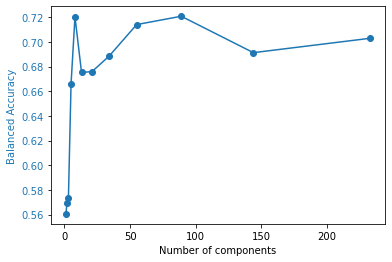

In [69]:
# Compute PCA with various numbers of components
components = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233] #[1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597]
accuracies = []
for n_components in components:
    pca = LocallyLinearEmbedding(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
    models,_ = clf.fit(X_train_pca, X_test_pca, y_train, y_test)
    accuracies.append(models['Balanced Accuracy'][0])

# Plot explained variance and accuracy
fig, ax1 = plt.subplots()
ax1.plot(components, accuracies, '-o', color='C0')
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Balanced Accuracy', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

plt.show()

### Variance vs Balanced Accuracy Experiment
Load any dataset and partition it using train test split before running this cell. Ensure number of columns > number of components

100%|██████████| 16/16 [03:03<00:00, 11.45s/it]


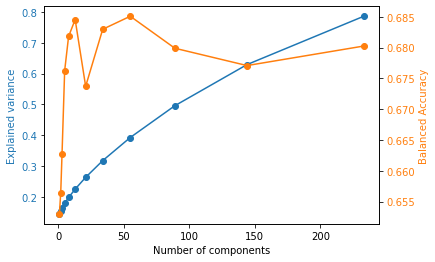

In [64]:
# Compute PCA with various numbers of components
components = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233]
explained_variance = []
accuracies = []
for n_components in components:
    pca = TruncatedSVD(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifier_list)
    models,_ = clf.fit(X_train_pca, X_test_pca, y_train, y_test)
    accuracies.append(models['Balanced Accuracy'][0])

# Plot explained variance and accuracy
fig, ax1 = plt.subplots()
ax1.plot(components, explained_variance, '-o', color='C0')
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Explained variance', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

ax2 = ax1.twinx()
ax2.plot(components, accuracies, '-o', color='C1')
ax2.set_ylabel('Balanced Accuracy', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

plt.show()